In [3]:
# Importing the required libraries & Filtering out the warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
#changing the display options for rows and columns
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
pd.set_option('display.width',200)

# Credit EDA Case Study

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Importing datasets

#### Reading the application_data in dataframe `application_data` and previous_application in dataframe `previous_application`

In [5]:
application_data = pd.read_csv("application_data.csv")
previous_application = pd.read_csv("previous_application.csv")

## Data understanding

### Application Data

In [140]:
#checking the top 5 rows of the dataframe application_data
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,INCOME_GROUP,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,IncomeCategory3,Agegroup_20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,IncomeCategory3,Agegroup_40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,IncomeCategory5,Agegroup_50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,IncomeCategory4,Agegroup_50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,IncomeCategory4,Agegroup_50-60


In [7]:
#checking the info for dataframe application_data
application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
#Statistical description of the application_data dataframe
application_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [9]:
#Checking the number of rows and columns in the application_data dataframe
application_data.shape

(307511, 122)

## Data Cleaning & Manipulation

#### We first make copies of our original data for back up purposes, and then continue with our analysis.

In [10]:
application_data_orig = application_data.copy()
previous_application_orig = previous_application.copy()

#### Finding the correlation of each column in the dataframe with the Target column

In [11]:
corr_mat=application_data.corr()
corr_mat[["TARGET"]].sort_values(by=["TARGET"],ascending=False)

,TARGET
TARGET,1.000000
DAYS_BIRTH,0.078239
REGION_RATING_CLIENT_W_CITY,0.060893
REGION_RATING_CLIENT,0.058899
DAYS_LAST_PHONE_CHANGE,0.055218
DAYS_ID_PUBLISH,0.051457
REG_CITY_NOT_WORK_CITY,0.050994
FLAG_EMP_PHONE,0.045982
REG_CITY_NOT_LIVE_CITY,0.044395
FLAG_DOCUMENT_3,0.044346


#### Finding the percentage of missing values in each column of the dataframes

In [12]:
# finding percentage of missing values in the dataframe application_data:

round(application_data.isnull().sum()/len(application_data)*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

#### We retrieve the list of columns which have percentages of missing values in application_data dataframe. For the purpose of our analysis, we drop those columns which have missing values > 50%. 

In [13]:
#finding the columns which have >50% missing values in application_data
columns_to_drop_missing = list(application_data.columns[(application_data.isnull().sum()/len(application_data)*100) >50])
columns_to_drop_missing

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [14]:
#dropping these columns with >50% missing values from application_data
application_data = application_data.drop(columns_to_drop_missing, axis =1)
application_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

In [15]:
#checking the dataframe for any duplicate rows
print(application_data.duplicated(subset=None, keep='first').sum())

0


### Missing value imputation analysis

In [16]:
# checking percentage of missing values in all columns of dataframe application_data:

round(application_data.isnull().sum()/len(application_data)*100,2).sort_values()

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

**We first analyse the following columns with missing values < 15%**

    AMT_REQ_CREDIT_BUREAU_WEEK      13.50  
    AMT_REQ_CREDIT_BUREAU_DAY       13.50  
    AMT_REQ_CREDIT_BUREAU_HOUR      13.50  
    AMT_REQ_CREDIT_BUREAU_MON       13.50  
    AMT_REQ_CREDIT_BUREAU_YEAR      13.50  
    AMT_REQ_CREDIT_BUREAU_QRT       13.50  
    AMT_GOODS_PRICE                  0.09  

In [17]:
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [18]:
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [19]:
application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [20]:
application_data["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [21]:
application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [22]:
application_data["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [23]:
application_data["AMT_GOODS_PRICE"].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

**Comments on Imputation of missing values:**

**For the column AMT_GOODS_PRICE, denoting the price of the goods for which the loan is given for consumer loans, we may impute the missing value with the median value.**

**We observe that for the following columns denoting Number of enquiries to Credit Bureau before the application have a median value of 0, or maximum number of entries in these columns have value 0:**

**AMT_REQ_CREDIT_BUREAU_WEEK      
AMT_REQ_CREDIT_BUREAU_DAY       
AMT_REQ_CREDIT_BUREAU_HOUR        
AMT_REQ_CREDIT_BUREAU_MON       
AMT_REQ_CREDIT_BUREAU_YEAR       
AMT_REQ_CREDIT_BUREAU_QRT**


**Hence the null values in these columns can be imputed by 0, to reflect the median value.**

### Changing datatypes of required columns

In [24]:
#checking the dataframe info
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [25]:
#finding the number of unique values and datatype of each column

application_data1=pd.DataFrame(application_data.nunique())
application_data1["Data_type"]=application_data.dtypes
application_data1.rename(columns = {0: "No of Unique values"},inplace = True) 
application_data1.sort_values(by = 'No of Unique values', inplace = True)
application_data1

,No of Unique values,Data_type
FLAG_DOCUMENT_3,2,int64
FLAG_PHONE,2,int64
FLAG_DOCUMENT_4,2,int64
FLAG_DOCUMENT_2,2,int64
REG_REGION_NOT_LIVE_REGION,2,int64
REG_REGION_NOT_WORK_REGION,2,int64
LIVE_REGION_NOT_WORK_REGION,2,int64
REG_CITY_NOT_LIVE_CITY,2,int64
REG_CITY_NOT_WORK_CITY,2,int64
LIVE_CITY_NOT_WORK_CITY,2,int64


From their number of unique values, we observe that the columns with type "object" are all categorical data types. Hence we convert these columns to categorical data type.

In [26]:
#Converting oject datatype columns into category datatype columns
application_data[application_data.select_dtypes(['object']).columns] = application_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

We also observe that the following columns in the application_data dataframe with type "int" are all categorical data types, as they have only two unique possible values. Hence we convert these columns to categorical data type.

In [27]:
columns_to_convert = ['TARGET', 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'LIVE_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', ]

In [28]:
# We also convert the above columns from int to categorical data type, as they have only two unique possible values in their data.
application_data[columns_to_convert] = application_data[columns_to_convert].astype('category')

In [29]:
#defining the custom functions for converting days to years for ease of analysis
def days_to_years(x):
    print(application_data[x].value_counts()) #checking values in the original column
    return(application_data[x].apply(lambda y :int(abs(y)/365))) #conversion from days to years
    application_data.drop(x,axis=1,inplace=True) #dropping the original column in days as we have a new column in years

In [30]:
#Checking DAYS_BIRTH column and converting from days to years.
application_data["AGE"] = days_to_years("DAYS_BIRTH")

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64


In [31]:
#Checking DAYS_EMPLOYED column and converting from days to years.
application_data["YEARS_EMPLOYED"] = days_to_years("DAYS_EMPLOYED")

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64


In [32]:
#Checking the cleaned dataframe application_data
application_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  int64   
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  category
 12  NAME_INCOME_TYPE              

## Analysis of Application Data

### Outlier identification

We check the columns with numerical datatypes for outliers. The following columns are analysed for outlier values:

AMT_INCOME_TOTAL   
AMT_CREDIT    
AMT_ANNUITY  
AMT_GOODS_PRICE  
AGE                   
DAYS_EMPLOYED                  
DAYS_REGISTRATION             
DAYS_ID_PUBLISH      
CNT_CHILDREN    
CNT_FAM_MEMBERS  

In [33]:
application_data[['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE','YEARS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','CNT_CHILDREN']].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0
AGE,307511.0,43.435968,11.954593,20.0,34.0,43.0,53.0,69.0
YEARS_EMPLOYED,307511.0,185.021521,381.972190,0.0,2.0,6.0,15.0,1000.0
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-24672.0,-7479.5,-4504.0,-2010.0,0.0
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
CNT_FAM_MEMBERS,307509.0,2.152665,0.910682,1.0,2.0,2.0,3.0,20.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0


### Plotting boxplot for outlier analysis:

We plot the above columns using boxplot:

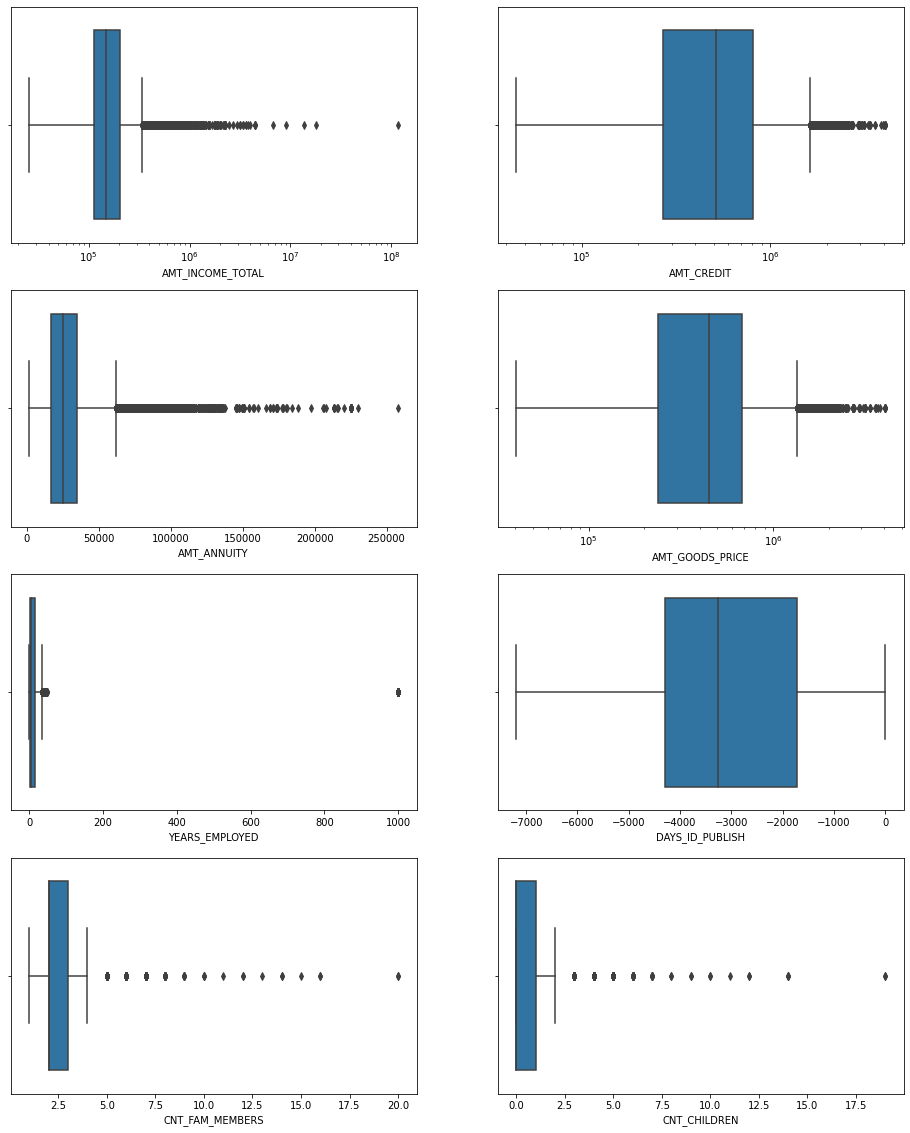

In [34]:
plt.figure(figsize=(16,20))

plt.subplot(4, 2, 1)
sns.boxplot(application_data["AMT_INCOME_TOTAL"])
plt.xscale('log')

plt.subplot(4, 2, 2)
sns.boxplot(application_data["AMT_CREDIT"])
plt.xscale('log')

plt.subplot(4, 2, 3)
sns.boxplot(application_data["AMT_ANNUITY"])

plt.subplot(4, 2, 4)
sns.boxplot(application_data["AMT_GOODS_PRICE"])
plt.xscale('log')

plt.subplot(4, 2, 5)
sns.boxplot(application_data["YEARS_EMPLOYED"])

plt.subplot(4, 2, 6)
sns.boxplot(application_data["DAYS_ID_PUBLISH"])

plt.subplot(4, 2, 7)
sns.boxplot(application_data["CNT_FAM_MEMBERS"])

plt.subplot(4, 2, 8)
sns.boxplot(application_data["CNT_CHILDREN"])

plt.show()

**Outliers detected from the above table and plots are as follows:**

1. AMT_INCOME_TOTAL : Maximum value is 117000000 which has a huge difference with the median value of 147150 and 75th percentile value of 202500.



2. AMT_CREDIT: Maximum value is 4050000 which has a huge difference with the median value of 24903 and 75th percentile value of 808650.



3. AMT_ANNUITY: Maximum value is 258025 which has a huge difference with the median value of 24903 and 75th percentile value of 34596.


4. AMT_GOODS_PRICE: Maximum value is 4050000 which has a huge difference with the median value of 808650 and 75th percentile value of 679500


5. YEARS_EMPLOYED: Maximum value is 1000 years.



6. CNT_CHILDREN	: Maximum count is 19, this outlier is clearly an error in the data.


### Binning Continuous Variables

In [35]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    307511 non-null  int64   
 1   TARGET                        307511 non-null  category
 2   NAME_CONTRACT_TYPE            307511 non-null  category
 3   CODE_GENDER                   307511 non-null  category
 4   FLAG_OWN_CAR                  307511 non-null  category
 5   FLAG_OWN_REALTY               307511 non-null  category
 6   CNT_CHILDREN                  307511 non-null  int64   
 7   AMT_INCOME_TOTAL              307511 non-null  float64 
 8   AMT_CREDIT                    307511 non-null  float64 
 9   AMT_ANNUITY                   307499 non-null  float64 
 10  AMT_GOODS_PRICE               307233 non-null  float64 
 11  NAME_TYPE_SUITE               306219 non-null  category
 12  NAME_INCOME_TYPE              

### The following variables are binned for further analysis:

### AMT_INCOME_TOTAL  
### AGE

In [36]:
#Checking AMT_INCOME_TOTAL column
application_data['AMT_INCOME_TOTAL'].describe().apply("{0:.5f}".format)

count       307511.00000
mean        168797.91930
std         237123.14628
min          25650.00000
25%         112500.00000
50%         147150.00000
75%         202500.00000
max      117000000.00000
Name: AMT_INCOME_TOTAL, dtype: object

In [37]:
#We bin the total income amount into 5 different categories: 
#For income between 0-100000: IncomeCategory5
#For income between 100000-200000: IncomeCategory4
#For income between 200000-300000: IncomeCategory3
#For income between 300000-400000: IncomeCategory2
#For income between 400000-500000: IncomeCategory1

application_data['INCOME_GROUP']=pd.cut(x=application_data['AMT_INCOME_TOTAL'],bins=[0,100000,200000,300000,400000,500000],labels=['IncomeCategory5','IncomeCategory4','IncomeCategory3','IncomeCategory2','IncomeCategory1'])

In [38]:
#Checking AGE column
application_data['AGE'].describe().apply("{0:.5f}".format)

count    307511.00000
mean         43.43597
std          11.95459
min          20.00000
25%          34.00000
50%          43.00000
75%          53.00000
max          69.00000
Name: AGE, dtype: object

In [39]:
#We bin the age column into 5 different categories: 
#For age between 20-30: Agegroup_20-30
#For age between 30-40: Agegroup_30-40
#For age between 40-50: Agegroup_40-50
#For age between 50-60: Agegroup_50-60
#For age between 60-70: Agegroup_60-70

application_data['AGE_GROUP']=pd.cut(x=application_data['AGE'],bins=[20,30,40,50,60,70], labels=['Agegroup_20-30','Agegroup_30-40','Agegroup_40-50','Agegroup_50-60','Agegroup_60-70'])

In [40]:
#checking the dataframe after binning
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,INCOME_GROUP,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1,IncomeCategory3,Agegroup_20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3,IncomeCategory3,Agegroup_40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0,IncomeCategory5,Agegroup_50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8,IncomeCategory4,Agegroup_50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8,IncomeCategory4,Agegroup_50-60


**We then choose the following 26 variables from the application dataset for the purpose of our analysis for this case study:**

    CODE_GENDER  
    FLAG_OWN_CAR	
    FLAG_OWN_REALTY	 
    AMT_INCOME_TOTAL 
    INCOME_GROUP
    AMT_CREDIT
    AMT_ANNUITY
    AMT_GOODS_PRICE
    NAME_INCOME_TYPE
    NAME_EDUCATION_TYPE
    NAME_FAMILY_STATUS
    REGION_POPULATION_RELATIVE
    AGE	
    AGE_GROUP
    YEARS_EMPLOYED
    FLAG_EMP_PHONE
    OCCUPATION_TYPE
    REGION_RATING_CLIENT_W_CITY
    REG_CITY_NOT_LIVE_CITY
    REG_CITY_NOT_WORK_CITY
    ORGANIZATION_TYPE
    NAME_CONTRACT_TYPE
    CNT_CHILDREN
    CNT_FAM_MEMBERS
    NAME_HOUSING_TYPE
    FLAG_EMAIL



In [41]:
selected_cols= ["SK_ID_CURR","TARGET","CODE_GENDER", "FLAG_OWN_CAR","FLAG_OWN_REALTY","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY",
"AMT_GOODS_PRICE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","REGION_POPULATION_RELATIVE","AGE", "YEARS_EMPLOYED",
"FLAG_EMP_PHONE","OCCUPATION_TYPE","REGION_RATING_CLIENT_W_CITY","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE",
"NAME_CONTRACT_TYPE","CNT_CHILDREN","CNT_FAM_MEMBERS","NAME_HOUSING_TYPE","FLAG_EMAIL","INCOME_GROUP", "AGE_GROUP"]

print(selected_cols)

['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'AGE', 'YEARS_EMPLOYED', 'FLAG_EMP_PHONE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_HOUSING_TYPE', 'FLAG_EMAIL', 'INCOME_GROUP', 'AGE_GROUP']


In [42]:
#dataframe containing the selected columns from the above list
application_data_final =application_data.loc[:,selected_cols]

In [43]:
#checking the dataframe with the selected columns
application_data_final.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE,FLAG_EMAIL,INCOME_GROUP,AGE_GROUP
0,100002,1,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,0.018801,25,1,1,Laborers,2,0,0,Business Entity Type 3,Cash loans,0,1.0,House / apartment,0,IncomeCategory3,Agegroup_20-30
1,100003,0,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,0.003541,45,3,1,Core staff,1,0,0,School,Cash loans,0,2.0,House / apartment,0,IncomeCategory3,Agegroup_40-50
2,100004,0,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,52,0,1,Laborers,2,0,0,Government,Revolving loans,0,1.0,House / apartment,0,IncomeCategory5,Agegroup_50-60
3,100006,0,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,0.008019,52,8,1,Laborers,2,0,0,Business Entity Type 3,Cash loans,0,2.0,House / apartment,0,IncomeCategory4,Agegroup_50-60
4,100007,0,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,54,8,1,Core staff,2,0,1,Religion,Cash loans,0,1.0,House / apartment,0,IncomeCategory4,Agegroup_50-60


### Data Imbalance Analysis for Target variable

**The 'Target variable' in the dataset is analysed for data imbalance. Target variable(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases)**

In [44]:
application_data_final['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

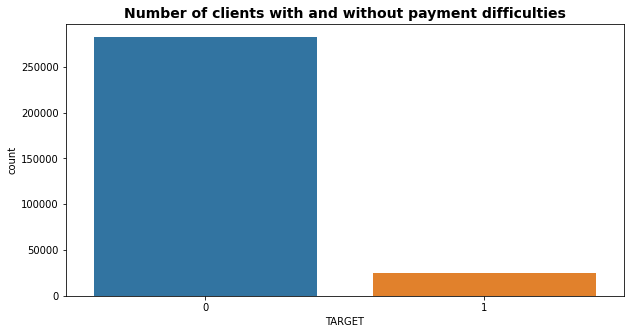

In [45]:
#Countplot showing no. of clients with Target variable =1 (payment difficulties) and Target variable =0 (all other cases)
plt.figure(figsize=(10,5))
sns.countplot(application_data_final['TARGET'])
plt.title("Number of clients with and without payment difficulties", fontsize = 14, fontweight="bold");

In [46]:
round(application_data_final['TARGET'].value_counts(normalize=True)*100,1)

0    91.9
1     8.1
Name: TARGET, dtype: float64

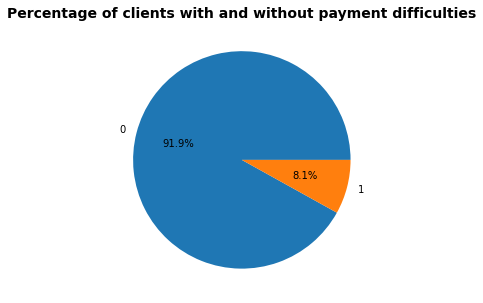

In [47]:
#Pie plot showing percentage of clients with Target variable =1 (payment difficulties) and Target variable =0 (all other cases)
plt.figure(figsize=(10,5))
plt.pie(round(application_data_final['TARGET'].value_counts(normalize=True)*100,2), labels = application_data_final['TARGET'].value_counts().index, autopct='%1.1f%%')
plt.title("Percentage of clients with and without payment difficulties", fontsize = 14, fontweight="bold");

**Inference: From the above observations, the total number of clients with payment difficulties is 24825 (which amounts to 8.1% of the loan applicants), in contrast to 282686 clients without payment difficulties (which amounts to 91.9% of the loan applicants). Therefore we can conclude that the data is imbalanced w.r.t the Target variable, as only 8.1% of the loan applicants in the dataset are defaulters compared to 91.9% non-defaulters.**


### Segmenting the dataframe w.r.t Target variable (clients with payment difficulties and no payment difficulties)

In [48]:
# Dividing the application_data dataset w.r.t Target variable into two parts (Target = 1 and Target = 0 respectively)

application_data_1 = application_data_final[application_data_final["TARGET"] == 1]
application_data_0 = application_data_final[application_data_final["TARGET"] == 0]

In [49]:
application_data_1.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE,FLAG_EMAIL,INCOME_GROUP,AGE_GROUP
0,100002,1,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,0.018801,25,1,1,Laborers,2,0,0,Business Entity Type 3,Cash loans,0,1.0,House / apartment,0,IncomeCategory3,Agegroup_20-30
26,100031,1,F,N,Y,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,0.018029,51,7,1,Cooking staff,2,0,0,Business Entity Type 3,Cash loans,0,1.0,House / apartment,0,IncomeCategory4,Agegroup_50-60
40,100047,1,M,N,Y,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,0.025164,47,3,1,Laborers,2,0,0,Business Entity Type 3,Cash loans,0,2.0,House / apartment,0,IncomeCategory3,Agegroup_40-50
42,100049,1,F,N,N,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,0.007305,36,9,1,Sales staff,3,0,0,Self-employed,Cash loans,0,2.0,House / apartment,0,IncomeCategory4,Agegroup_30-40
81,100096,1,F,N,Y,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,0.028663,67,1000,0,NaN,2,0,0,XNA,Cash loans,0,2.0,House / apartment,0,IncomeCategory5,Agegroup_60-70


In [50]:
application_data_0.head()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE,FLAG_EMAIL,INCOME_GROUP,AGE_GROUP
1,100003,0,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,0.003541,45,3,1,Core staff,1,0,0,School,Cash loans,0,2.0,House / apartment,0,IncomeCategory3,Agegroup_40-50
2,100004,0,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,0.010032,52,0,1,Laborers,2,0,0,Government,Revolving loans,0,1.0,House / apartment,0,IncomeCategory5,Agegroup_50-60
3,100006,0,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,0.008019,52,8,1,Laborers,2,0,0,Business Entity Type 3,Cash loans,0,2.0,House / apartment,0,IncomeCategory4,Agegroup_50-60
4,100007,0,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,0.028663,54,8,1,Core staff,2,0,1,Religion,Cash loans,0,1.0,House / apartment,0,IncomeCategory4,Agegroup_50-60
5,100008,0,M,N,Y,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,0.035792,46,4,1,Laborers,2,0,0,Other,Cash loans,0,2.0,House / apartment,0,IncomeCategory5,Agegroup_40-50


## Univariate Analysis of application_data_1 (Target =1) and application_data_0 (Target =0)

### Univariate: Continuous

In [51]:
application_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   24825 non-null  int64   
 1   TARGET                       24825 non-null  category
 2   CODE_GENDER                  24825 non-null  category
 3   FLAG_OWN_CAR                 24825 non-null  category
 4   FLAG_OWN_REALTY              24825 non-null  category
 5   AMT_INCOME_TOTAL             24825 non-null  float64 
 6   AMT_CREDIT                   24825 non-null  float64 
 7   AMT_ANNUITY                  24825 non-null  float64 
 8   AMT_GOODS_PRICE              24804 non-null  float64 
 9   NAME_INCOME_TYPE             24825 non-null  category
 10  NAME_EDUCATION_TYPE          24825 non-null  category
 11  NAME_FAMILY_STATUS           24825 non-null  category
 12  REGION_POPULATION_RELATIVE   24825 non-null  float64 
 13  

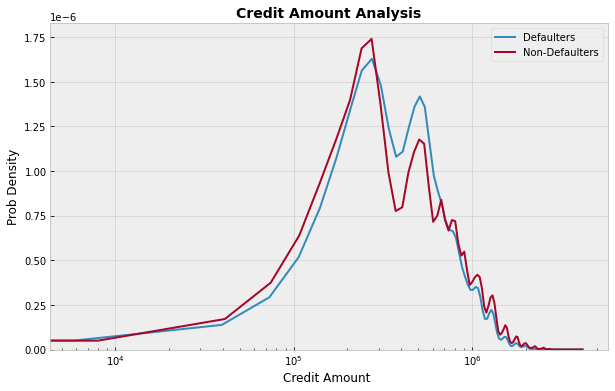

In [52]:
# Credit amount of the loan for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.distplot(application_data_1['AMT_CREDIT'], hist = False, label = 'Defaulters')
sns.distplot(application_data_0['AMT_CREDIT'], hist = False, label = 'Non-Defaulters')
plt.xscale('log')
plt.title("Credit Amount Analysis", fontsize = 14, fontweight="bold")
plt.xlabel('Credit Amount '); 
plt.ylabel('Prob Density')
plt.show();

**Inference:** We observe that the probability density of defaulters and non-defaulters varies in a similar manner with the credit amount, initially increases with credit amount, reaches a peak value and then decreases with several spike values.

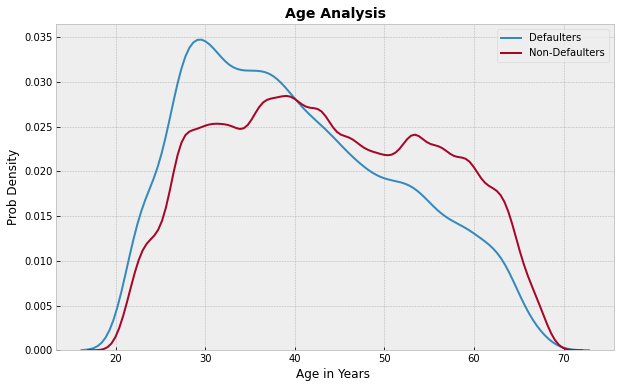

In [53]:
# Age for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.distplot(application_data_1['AGE'], hist=False, label = 'Defaulters')
sns.distplot(application_data_0['AGE'], hist=False, label = 'Non-Defaulters')
plt.title("Age Analysis", fontsize = 14, fontweight="bold")
plt.xlabel('Age in Years '); 
plt.ylabel('Prob Density')
plt.show();

**Inference:** From the above graph we observe that there is an increase in the probability density of defaulters upto the age of 30 years, after which the number decreases with the increase in age. For non-defaulters, it can be observed to increase in the age group 20-40 and then decrease. So the probability of default decreases as age increases.

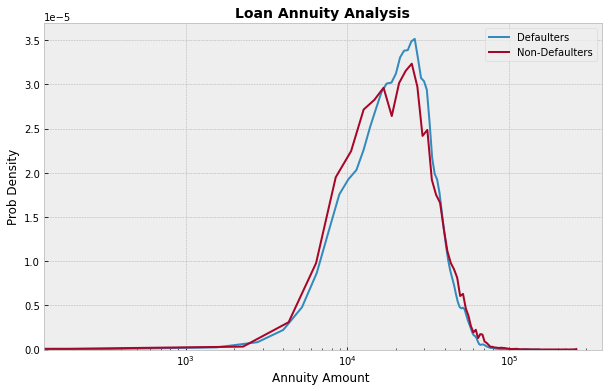

In [54]:
# Loan annuity for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
sns.distplot(application_data_1['AMT_ANNUITY'], hist=False, label = 'Defaulters')
sns.distplot(application_data_0['AMT_ANNUITY'], hist=False, label = 'Non-Defaulters')
plt.title("Loan Annuity Analysis", fontsize = 14, fontweight="bold")
plt.xlabel('Annuity Amount '); 
plt.ylabel('Prob Density')
plt.xscale('log')
plt.show();

**Inference:** We observe that the probability density  of defaulters and non-defaulters varies in a similar manner with the annuity amount. There is an increase with the annuity amount, reaches a peak value and then decreases.

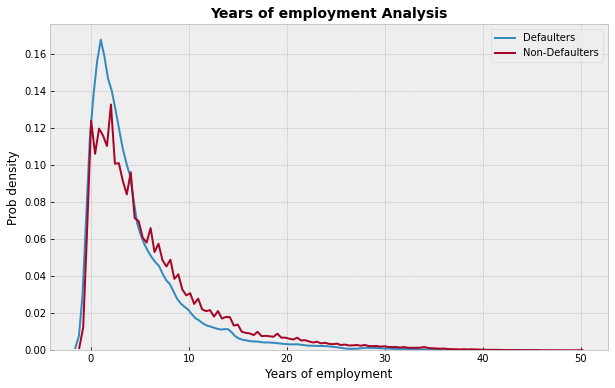

In [141]:
# Years of employment for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
application_data_1['YEARS_EMPLOYED'].replace(1000,np.nan,inplace=True) #removing the outlier value = 1000 from the graph
application_data_0['YEARS_EMPLOYED'].replace(1000,np.nan,inplace=True) #removing the outlier value = 1000 from the graph
sns.distplot(application_data_1['YEARS_EMPLOYED'], hist=False, label = 'Defaulters')
sns.distplot(application_data_0['YEARS_EMPLOYED'], hist=False, label = 'Non-Defaulters')
plt.title('Years of employment Analysis', fontsize = 14, fontweight="bold")
plt.xlabel('Years of employment')
plt.ylabel('Prob density')
plt.show();

**Inference:** We observe that the probability of a client defaulting is high during their initial years of employment. There is a steep increase in the chances of defaulting observed in 0-2 years of employment, and thereafter the probability decreases as the years of employment increases.

### Univariate: Categorical

In [56]:
# We define a custom function for univariate analysis of categorical columns.
# This custom functions plots two subplots side-by-side for categorical variables, for Target=1 and Target=0 respectively.
# The categorical variable plotted on x-axis, and the percentage of defaulters in that category is plotted on y-axis.

def univariate_categorical_analysis_percent(x):
    plt.figure(figsize=(14,6))
    
    ax1 = plt.subplot(1,2,1)
    application_data_1_percent = application_data_1[x].value_counts()/application_data[x].value_counts()*100
    application_data_1_percent = pd.DataFrame(application_data_1_percent)
    application_data_1_percent.reset_index(inplace=True)
    application_data_1_percent.rename(columns=  {"index": x, x:"Percentage of Defaulters"}, inplace = True) 
    plot1 = sns.barplot(x=x, y='Percentage of Defaulters', data=application_data_1_percent)
    plot1.set_title("Defaulters (Target=1)")
    plot1.set_xlabel(x)
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
    for p in plot1.patches:
        plot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    ax0 = plt.subplot(1,2,2)
    application_data_0_percent = application_data_0[x].value_counts()/application_data[x].value_counts()*100
    application_data_0_percent = pd.DataFrame(application_data_0_percent)
    application_data_0_percent.reset_index(inplace=True)
    application_data_0_percent.rename(columns=  {"index": x, x:"Percentage of Non-Defaulters"}, inplace = True) 
    plot0 = sns.barplot(x=x, y='Percentage of Non-Defaulters', data=application_data_0_percent)
    plot0.set_title("Non Defaulters (Target=0)")
    plot0.set_xlabel(x)
    plot0.set_xticklabels(plot0.get_xticklabels(),rotation=90)
    for p in plot0.patches:
        plot0.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
    plt.show()

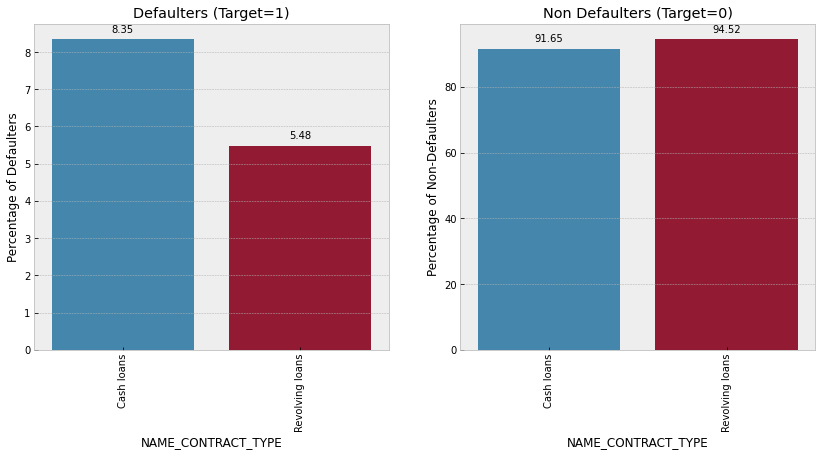

In [57]:
#Analysis of Contract type on Default percentage
univariate_categorical_analysis_percent("NAME_CONTRACT_TYPE")

**Inference:** It is observed that customers who have taken cash loans have a higher chance of defaulting than customers who have taken revolving loans. For cash loans, the default percentage is 8.35% compared to 5.48% for revolving loans.

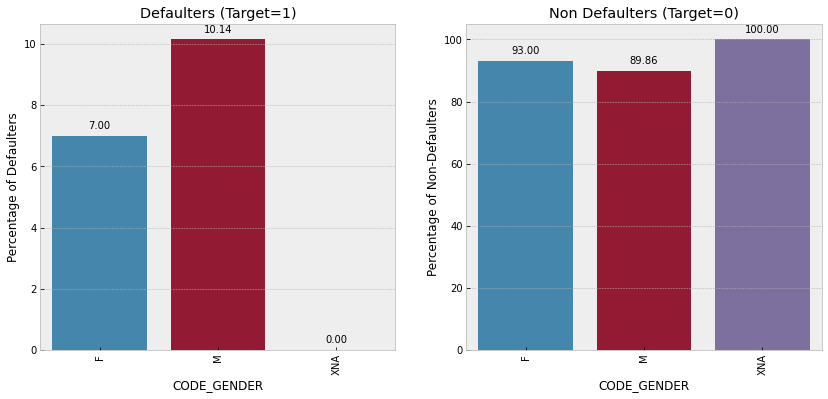

In [58]:
#Analysis of Gender on Default percentage
univariate_categorical_analysis_percent("CODE_GENDER")

**Inference:** There is a higher percentage of defaulters amongst male clients than female clients. The percentage of default is 10.14% in males, compared to 7% in females.

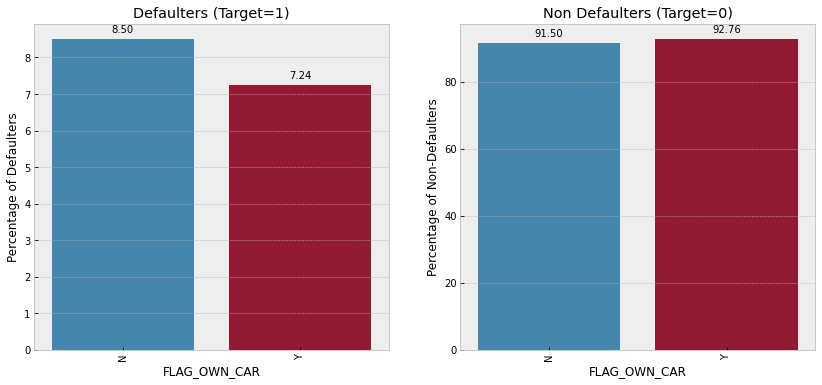

In [59]:
#Analysis of client owning a car on Default percentage
univariate_categorical_analysis_percent("FLAG_OWN_CAR")

**Inference:** Customers owning a car are less likely to default than customers without own cars. The customers who own a car have a defaulter rate of 7.24%, whereas customers not owning a car have a defaulter rate of 8.5%.

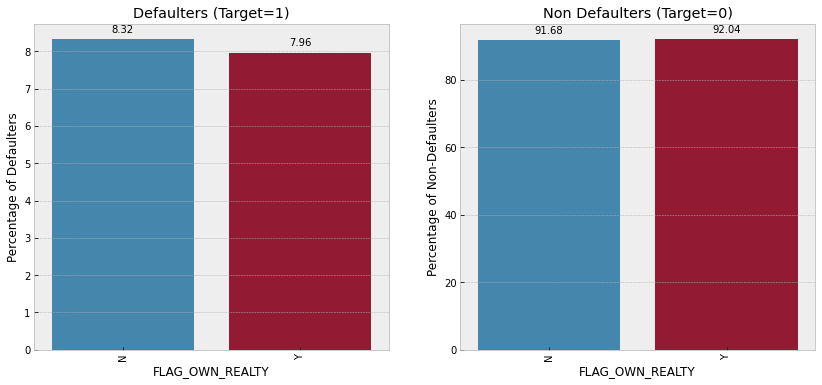

In [60]:
#Analysis of client owning a house/flat on Default percentage
univariate_categorical_analysis_percent("FLAG_OWN_REALTY")

**Inference:** The clients who own a house/flat are less likely to default than customers who do not own house/flat. The clients owning a house/flat have a 7.96% default percentage, compared to 8.32% default percentage in clients not owning a house/flat.

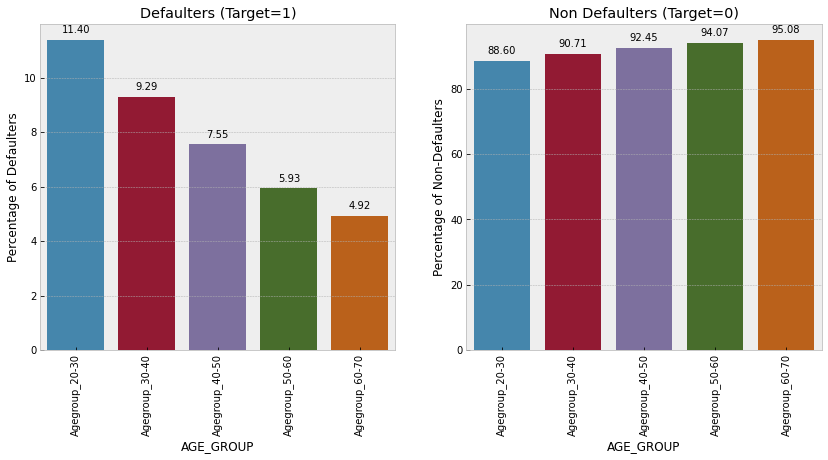

In [61]:
#Analysis of Age group on Default percentage
univariate_categorical_analysis_percent("AGE_GROUP")

**Inference:** It is observed that clients in the age group of 20-30 years have the highest default rate at 11.4%. The defaulters rate is inversely proportional to age, and decreases as age of the client increases. The clients in the oldest age group of 60-70 years have a lower default rate of 4.9%.

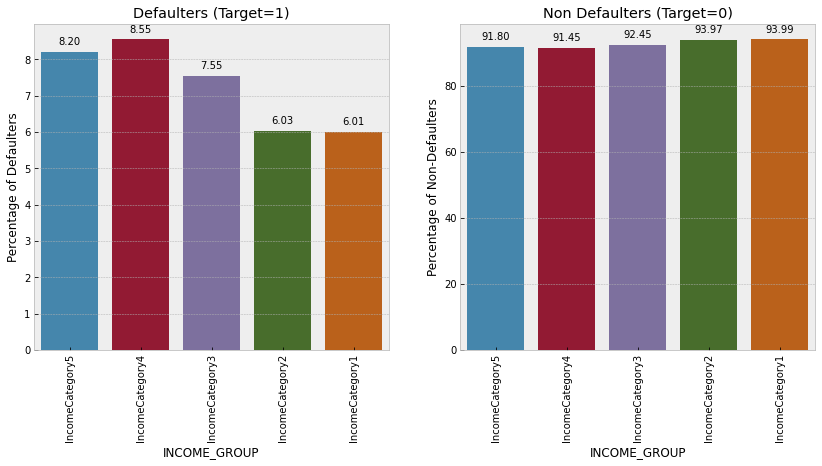

In [62]:
#Analysis of Income group on Default percentage
univariate_categorical_analysis_percent("INCOME_GROUP")

**Inference:** We observe the percentage of defaulters amongst the different income groups. The highest income group (Category 1 with total income in the range of 400000-500000) has the lowest percentage of defaulters. The Category 4 group (with total income in the range of 100000-200000) is most likely to default, having a default rate of 8.55%. The Category 5 group (with total income in the range of 0-100000) also has a close default rate of 8.2%.

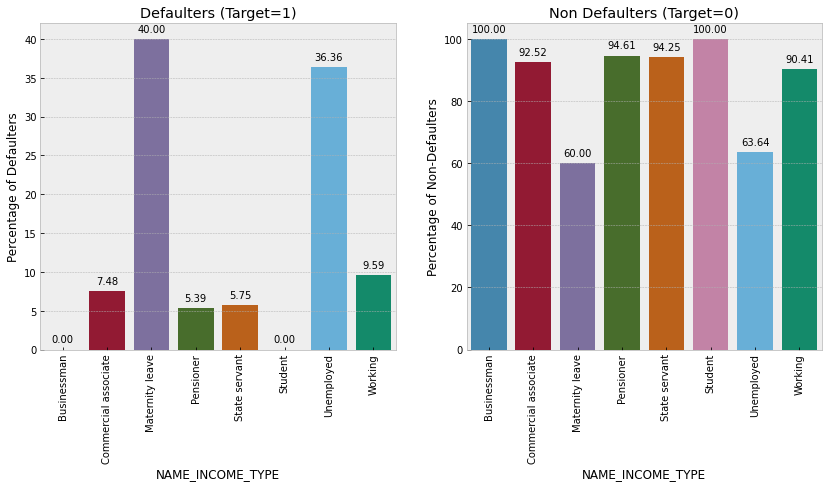

In [63]:
#Analysis of Clients Income type on Default percentage
univariate_categorical_analysis_percent("NAME_INCOME_TYPE")

**Inference:** Clients on maternity leave have a high default rate of 40%, followed by unemployed category at 36.36%. On the other hand, students and businessmen have a default rate of 0%. However, it is to be noted that the count of such clients is much less in our dataset (Maternity leave-5, Students -18, Unemployed-22 and Businessman-10). Hence these observations may not reflect the actual trend due to the low number of observations in these categories.

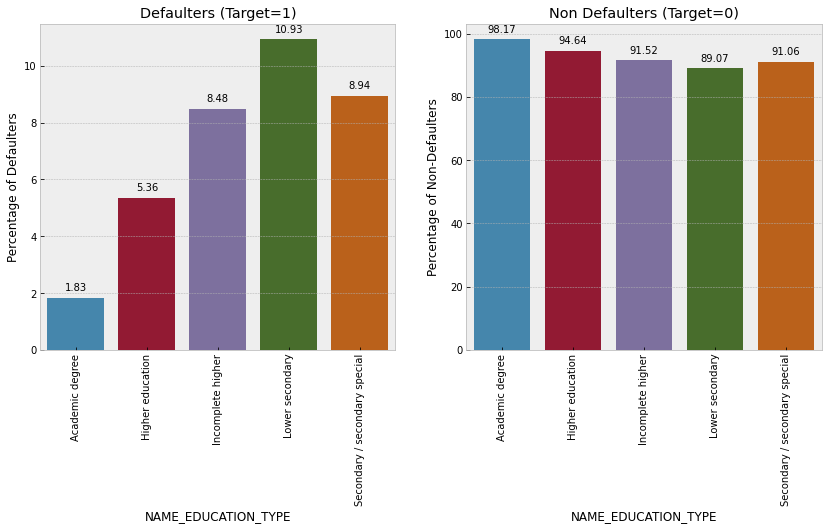

In [64]:
#Analysis of Clients highest education level on Default percentage
univariate_categorical_analysis_percent("NAME_EDUCATION_TYPE")

**Inference:** Clients with an academic degree have the lowest percentage of defaulters at 1.83%. Clients with a lower secondary degree have the highest percentage of defaulters at 10.93%, followed by Secondary (8.94%) and Incomplete higher(8.48%). The count of clients holding an academic degree in our dataset is 164, which is much less than the other groups.

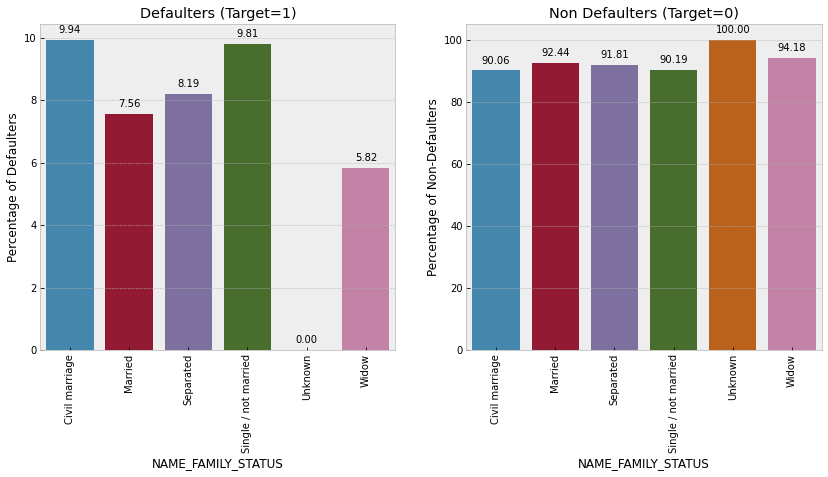

In [65]:
#Analysis of Clients Family status on Default percentage
univariate_categorical_analysis_percent("NAME_FAMILY_STATUS")

**Inference:** The default rate is higher in clients who have a civil marriage (9.94%) or are single/not married (9.81%), compared to clients who are married (7.56%), separated (8.19%) or widowed (5.82%). 

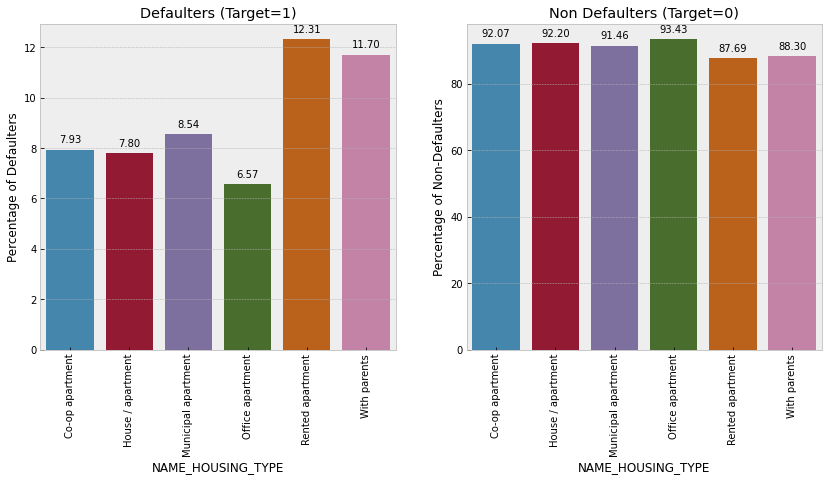

In [66]:
#Analysis of Clients housing status on Default percentage
univariate_categorical_analysis_percent("NAME_HOUSING_TYPE")

**Inference:** Clients living in rented apartment or with parents are more likely to default (with default of 12.3% and 11.7% respectively), whereas clients living in office apartment are the least likely defaulters at 6.57% default rate. 

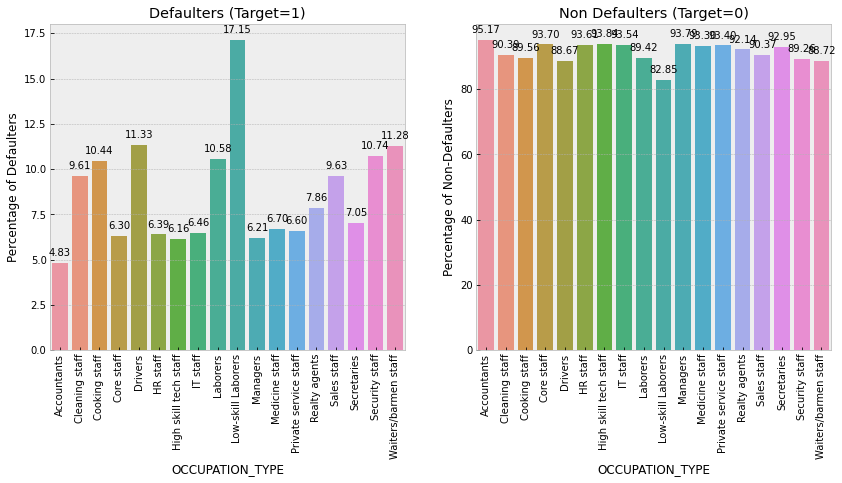

In [67]:
#Analysis of Clients occupation type on Default percentage
univariate_categorical_analysis_percent("OCCUPATION_TYPE")

**Inference:** The default percentage is the highest among low-skill laborers (17.15%). Accountants have the lowest rate of defaulters (4.83%). Core staff, high skill tech staff, HR staff, IT staff and Managers are also less likely to default among other categories, with percentage of defaulting between 6-6.5%.

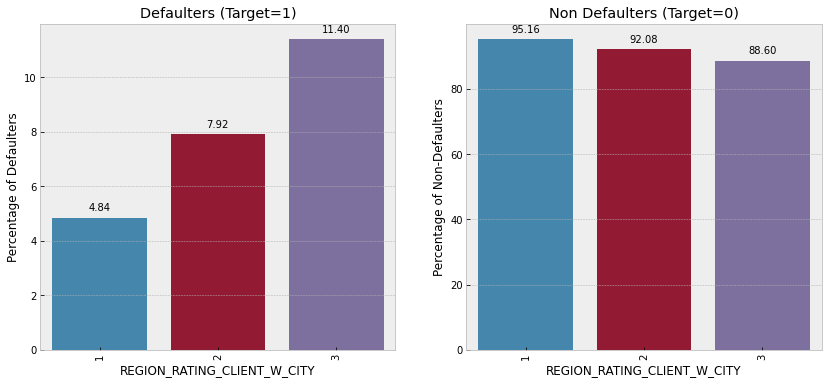

In [68]:
#Analysis of Clients region/city rating on Default percentage
univariate_categorical_analysis_percent("REGION_RATING_CLIENT_W_CITY")

**Inference:** Clients living in region/city with rating 1 have the lowest defaut rate of 4.84%, followed by those in region/city with rating 2 at default rate 7.92% , and region/city with rating 3 at highest default rate of 11.4%.

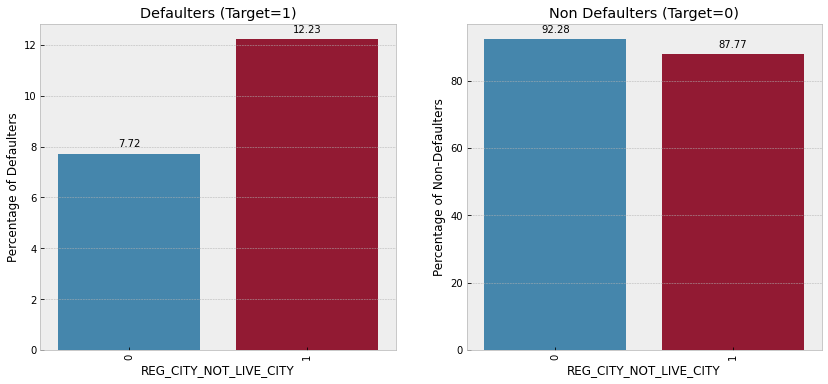

In [69]:
#Analysis of Clients permanent address not matching contact address on Default percentage
univariate_categorical_analysis_percent("REG_CITY_NOT_LIVE_CITY")

**Inference:** For clients whose permanent address does not match contact address (Flag=1), the default percentage is higher at 12.23%, whereas for clients whose permanent address matches contact address (Flag=0), the default percentage is lower at 7.72%. 

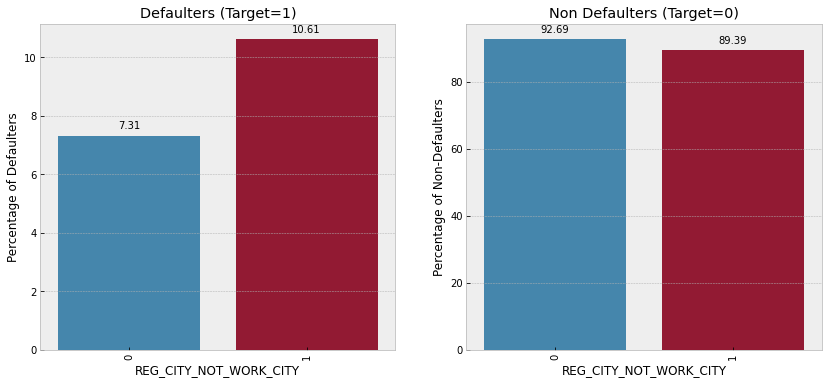

In [70]:
#Analysis of Clients permanent address not matching work address on Default percentage
univariate_categorical_analysis_percent("REG_CITY_NOT_WORK_CITY")

**Inference:** For clients whose permanent address does not match their work address (Flag=1), the default percentage is higher at 10.61%, whereas for clients whose permanent address matches work address (Flag=0), the default percentage is lower at 7.3%.

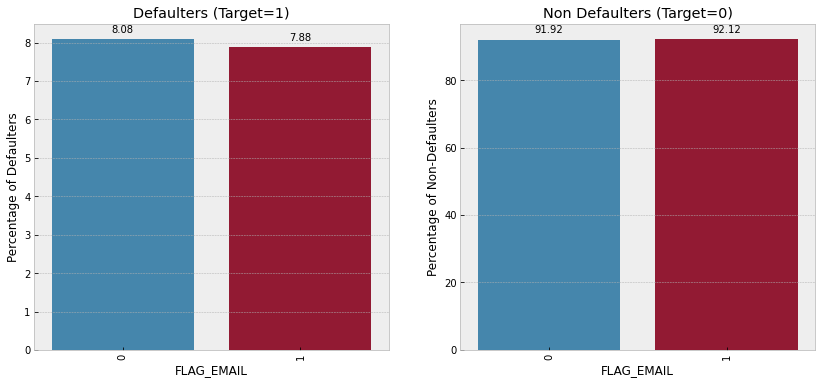

In [71]:
#Analysis of Clients providing email address on Default percentage
univariate_categorical_analysis_percent("FLAG_EMAIL")

**Inference:** Clients who have provided an email address (Flag=1) have a lower percentage of defaulters (7.88%) when compared to clients who have a default percentage of 8.08% when they have not provided an email address (Flag =0).

## Bivariate Analysis of application_data_1 (Target =1) and application_data_0 (Target =0)

### Bivariate: Continuous-Continuous

In [72]:
#We define a custom function for bivariate analysis of continuous columns.
#This custom functions plots two subplots side-by-side for continuous variables, for Target=0 and Target=1 respectively.

def bivariate_cont_analysis(x1,x2):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x1,x2, data = application_data_1)
    plt.title("Defaulters (Target=1)")
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.scatterplot(x1,x2, data = application_data_0)
    plt.title("Non-Defaulters (Target=0)")
    plt.xticks(rotation=90)
    
    plt.show()

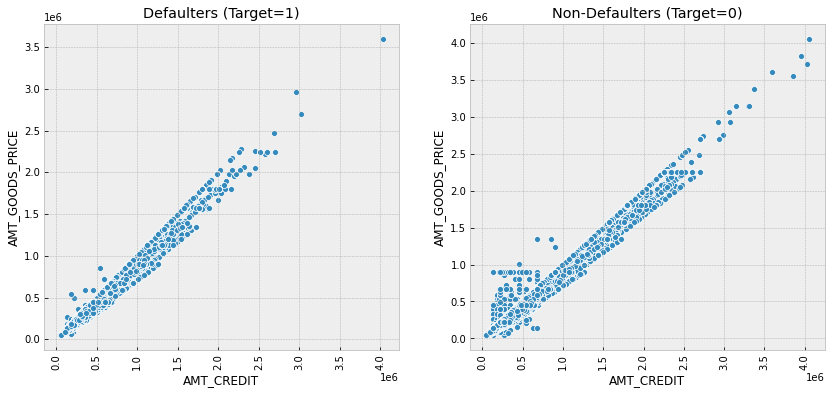

In [73]:
#Loan amount Vs Price of goods for which loan is taken
bivariate_cont_analysis("AMT_CREDIT","AMT_GOODS_PRICE")

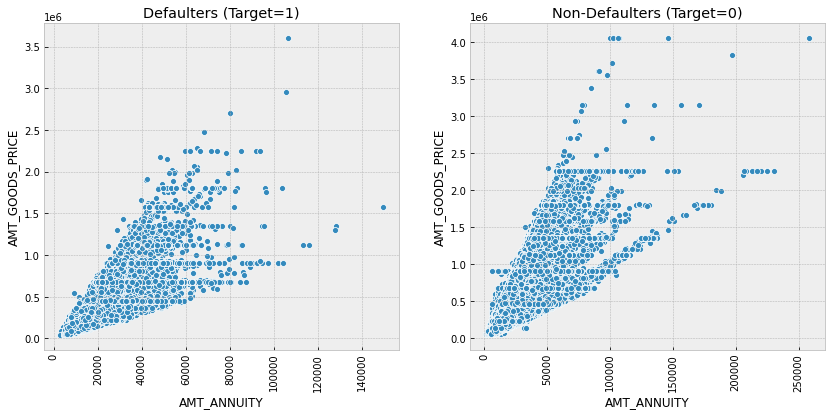

In [74]:
#Annuity amount Vs Price of goods for which loan is taken
bivariate_cont_analysis("AMT_ANNUITY","AMT_GOODS_PRICE")

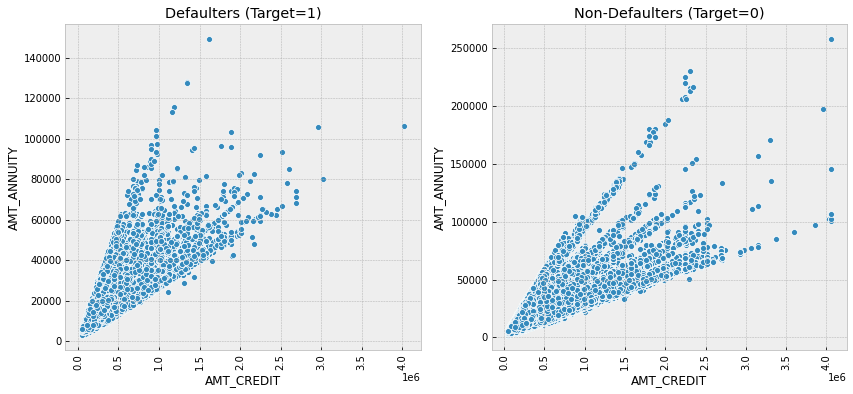

In [75]:
#Credit amount Vs Annuity amount
bivariate_cont_analysis("AMT_CREDIT","AMT_ANNUITY")

**Inference:** A high correlation may be observed among the following variables for both the defaulters and non-defaulters category of clients:

AMT_CREDIT,AMT_GOODS_PRICE :The credit amount increases, as the price of the goods for which the loan is being taken increases.
AMT_ANNUITY,AMT_GOODS_PRICE: The loan annuity amount increases, as the price of the goods for which the loan is taken increases.
AMT_CREDIT,AMT_ANNUITY: The credit amount and the annuity amount of the loan increases proportionately and can be observed to have a high correlation between them.

### Bivariate: Continuous-Categorical

In [76]:
#We define a custom function for bivariate analysis of continuous & categorical columns.
#This custom functions plots two subplots side-by-side for continuous & categorical variables, for Target=0 and Target=1 respectively.

def bivariate_cont_catg_analysis(x1,x2):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    sns.boxplot(x1,x2, data = application_data_1)
    plt.title("Defaulters (Target=1)")
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(x1,x2, data = application_data_0)
    plt.title("Non-Defaulters (Target=0)")
    plt.xticks(rotation=90)
    
    plt.show()

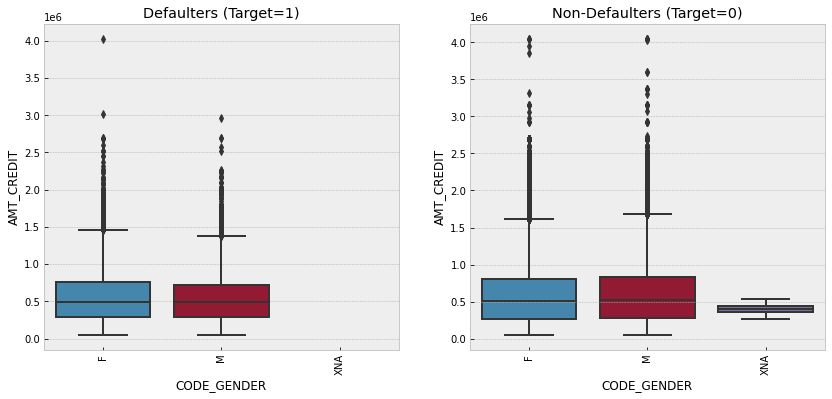

In [77]:
#Clients Gender Vs Credit Amount
bivariate_cont_catg_analysis("CODE_GENDER","AMT_CREDIT")

**Inference:** Females have a slightly higher maximum credit amount than males in defaulters category, there are outlier values for both genders. The interquartile credit range is also higher for females than males for defaulters, however the median credit amount for defaulters is identical for both males and females.

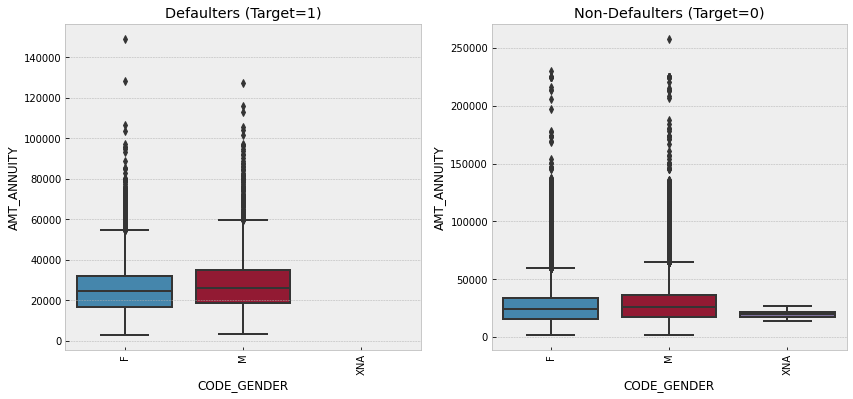

In [78]:
#Clients Gender Vs Annuity Amount
bivariate_cont_catg_analysis("CODE_GENDER","AMT_ANNUITY")

**Inference:** The maximum ,median annuity amount and the interquartile range of annuity amount tends to be higher for male defaulters than female defaulters.

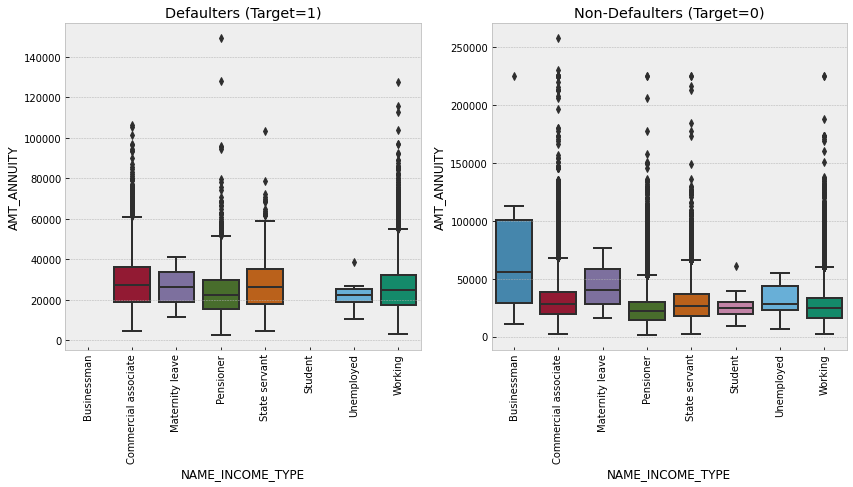

In [79]:
# Clients income type Vs annuity amount.
bivariate_cont_catg_analysis("NAME_INCOME_TYPE","AMT_ANNUITY")

**Inference:** In the defaulters category, commercial associates have a higher maximum annuity amount than other income type groups. The maximum annuity amount in the defaulters category is the lowest for unemployed group.

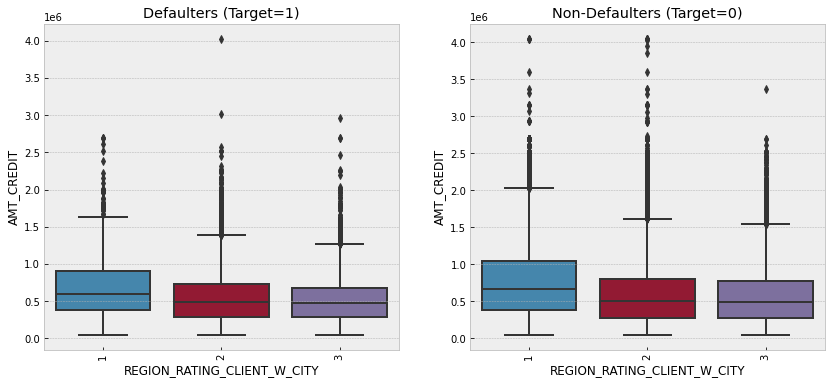

In [80]:
#Region/City rating Vs Credit Amount
bivariate_cont_catg_analysis("REGION_RATING_CLIENT_W_CITY","AMT_CREDIT")

**Inference:** Defaulter clients in regions/cities with rating 1 have a higher maximum and median value of credit amount, than clients in regions/cities with rating  2 and 3 respectively. Clients in regions/cities with rating 1 have lowest values of credit amount.

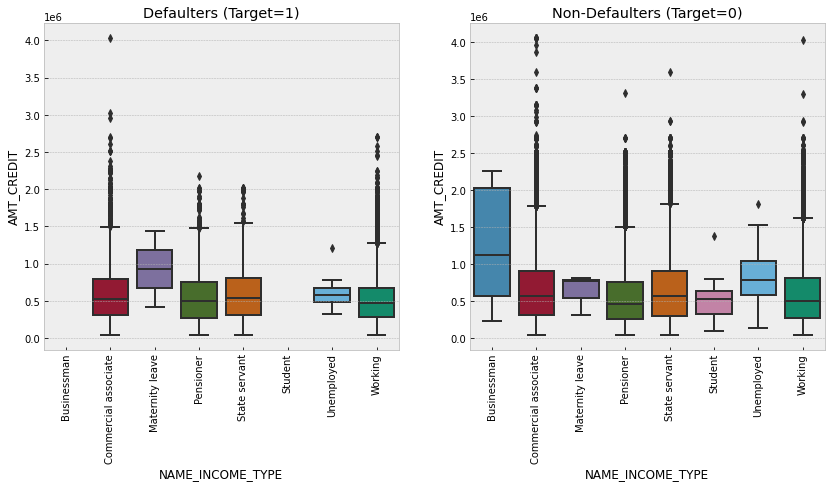

In [81]:
#Clients income type Vs Credit Amount
bivariate_cont_catg_analysis("NAME_INCOME_TYPE","AMT_CREDIT")

**Inference:** The credit amount median value is the highest for clients on maternity leave in the defaulters category. State servants, commercial associates and pensioners have identical amount of credits in defaulters group.

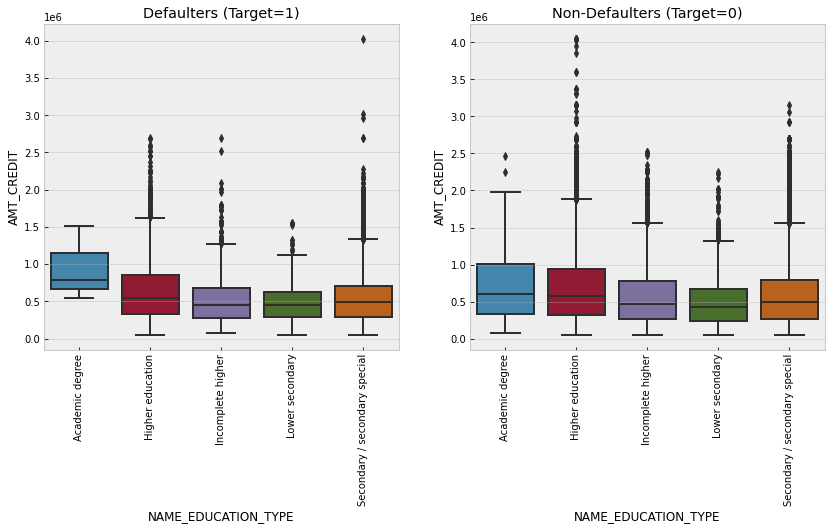

In [82]:
#Clients education level Vs Credit Amount
bivariate_cont_catg_analysis("NAME_EDUCATION_TYPE","AMT_CREDIT")

**Inference:** Clients with an academic degree have a higher median credit amount when they are defaulters.

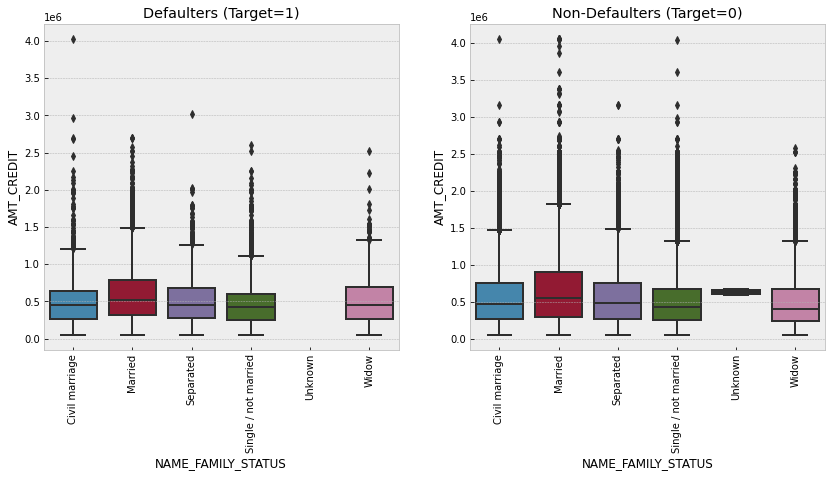

In [83]:
#Clients family status Vs Credit Amount
bivariate_cont_catg_analysis("NAME_FAMILY_STATUS","AMT_CREDIT")

**Inference:** Married clients have the highest credit amount maximum value and median values compared to other family status categories in the defaulters group.

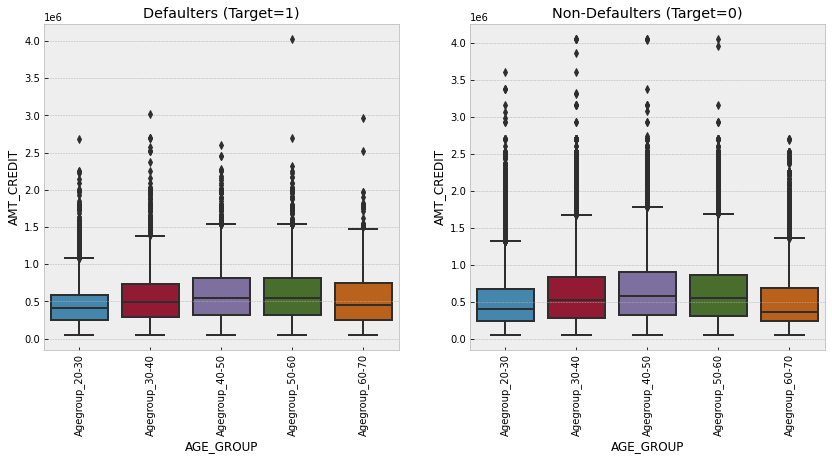

In [84]:
#Clients age group Vs Credit Amount
bivariate_cont_catg_analysis("AGE_GROUP","AMT_CREDIT")

**Inference:** Defaulter clients in age group 40-50 yrs have a higher credit amount whereas age group 20-30 years have the lowest credit amount amongst the different age groups.

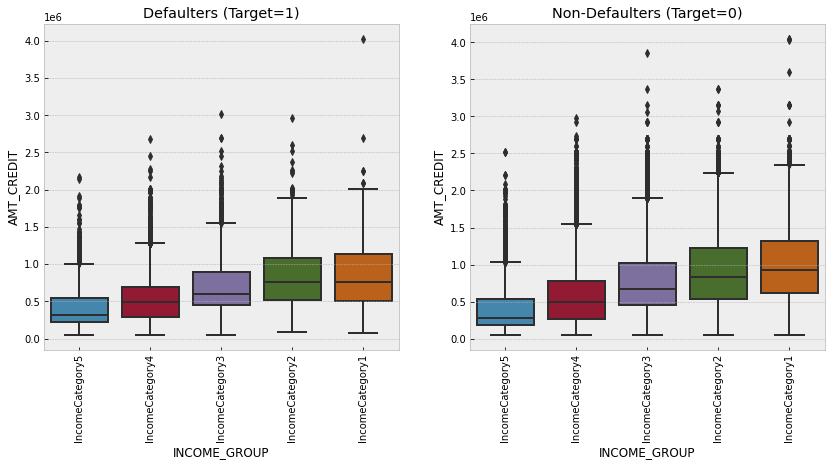

In [85]:
#Clients income group Vs Credit Amount
bivariate_cont_catg_analysis("INCOME_GROUP","AMT_CREDIT")

**Inference:** The highest income group of clients in the defaulters category, has a higher credit amount than other income groups. The lowest income group has the least credit amount.

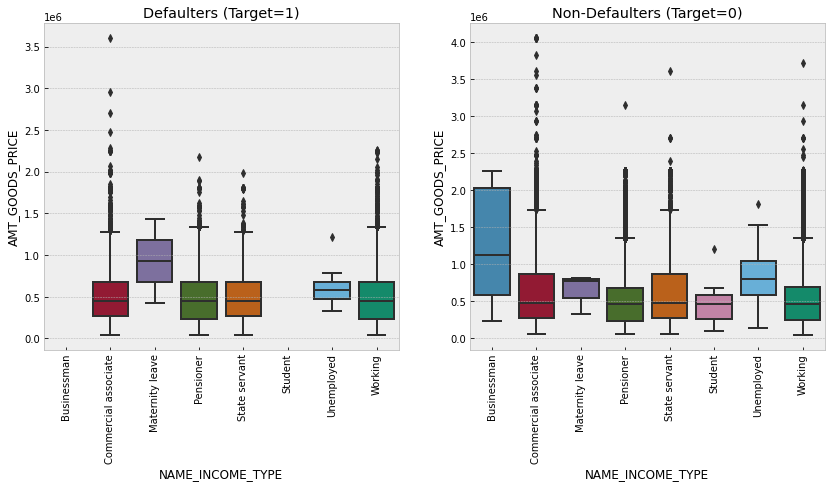

In [86]:
#Clients income group Vs Goods price for which loan is taken
bivariate_cont_catg_analysis("NAME_INCOME_TYPE","AMT_GOODS_PRICE")

**Inference:** Clients on maternity leave have a high default probability with respect to goods price for which loan is taken. Businessmen have a default rate of 0%. However, it is to be noted that the count of such clients is much less in our dataset (Maternity leave-5,and Businessman-10). Hence these observations may not reflect the actual trend due to the low number of observations in these categories.

### Bivariate: Categorical-Categorical

In [87]:
# We define a custom function for bivariate analysis of categorical columns.
# This custom functions plots two subplots side-by-side for two categorical variables, for Target=1 and Target=0 respectively.
# One categorical variable plotted on x-axis, the count of that variable is plotted on y-axis, and the hue determines the other categorical variable.

def bivariate_catg_analysis(x1,x2):
    plt.figure(figsize = (14,6))
    
    plt.subplot(1,2,1)
    plt.title("Defaulters(Target=1)")
    sns.countplot(x = x1, hue = x2, data = application_data_1)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.title("Non-Defaulters(Target=0)")
    sns.countplot(x = x1, hue = x2, data = application_data_0)
    plt.xticks(rotation=90)

    plt.show()


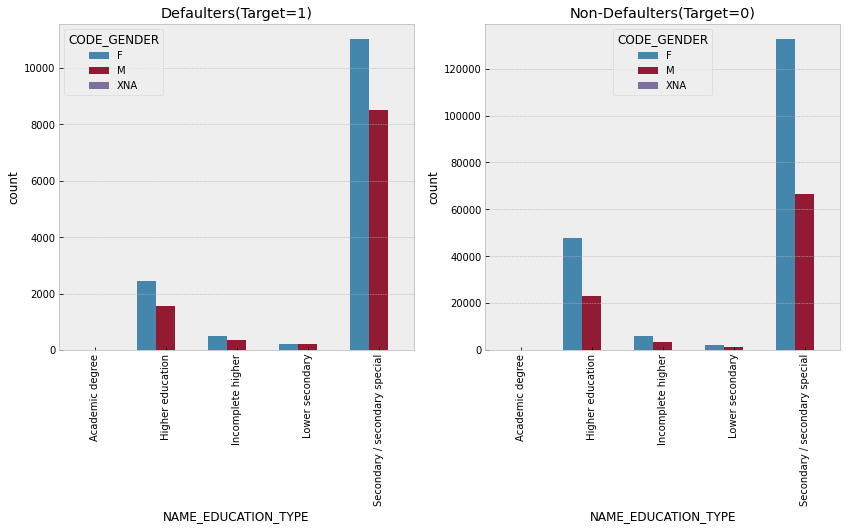

In [88]:
# Bivariate analysis of clients gender and highest level of education
bivariate_catg_analysis("NAME_EDUCATION_TYPE","CODE_GENDER")

**Inference:** There is a higher count of clients with secondary/secondary special level of education in the defaulters category, of which, the number of females is more than the number of males in this category. 

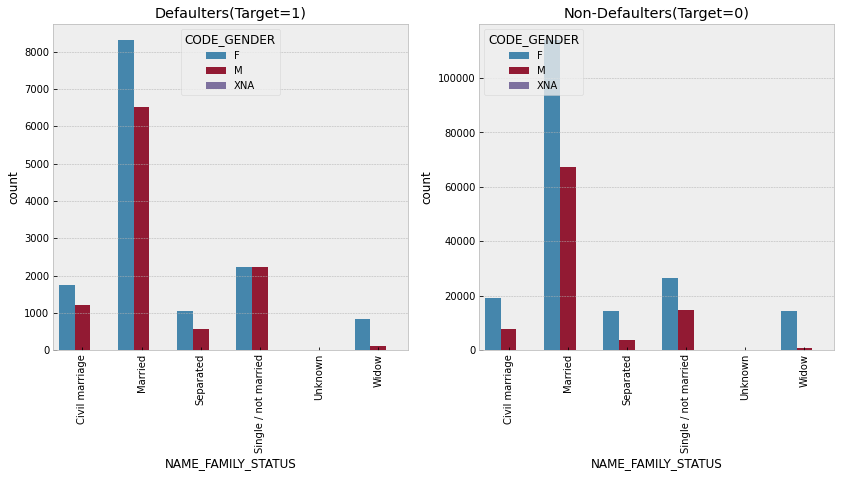

In [89]:
# Bivariate analysis of clients gender and family status
bivariate_catg_analysis("NAME_FAMILY_STATUS","CODE_GENDER")

**Inference:** The number of married female defaulters is more than married male defaulters, while the total number of both is higher than other groups in defaulters group.

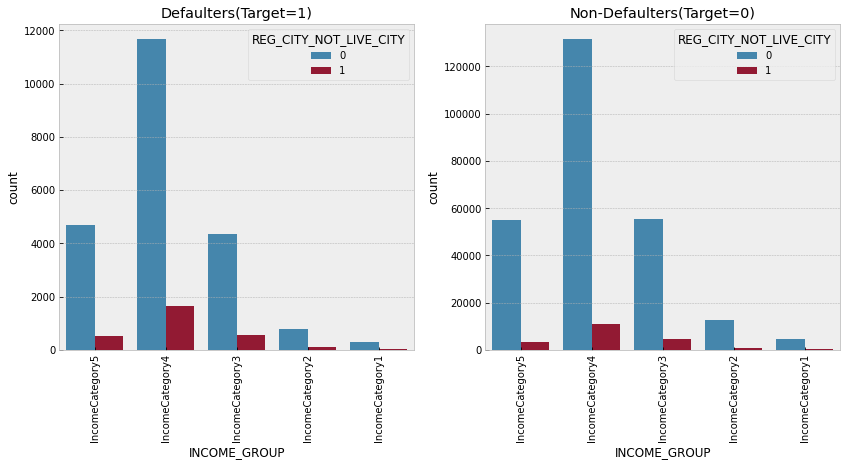

In [90]:
# Bivariate analysis of clients income group and contact address differs from permanent address
bivariate_catg_analysis("INCOME_GROUP","REG_CITY_NOT_LIVE_CITY")

**Inference:** Clients who belong to lower income group whose contact address differs from permanent address, have a high number of defaulters.

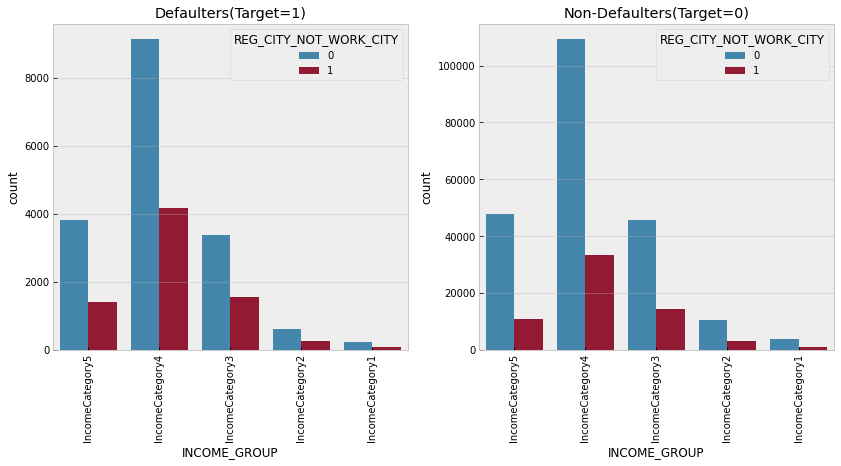

In [91]:
# Bivariate analysis of clients income group and contact address differs from permanent address
bivariate_catg_analysis("INCOME_GROUP","REG_CITY_NOT_WORK_CITY")

**Inference:** Clients who belong to lower income group whose work address differs from permanent address, have a high number of defaulters.

## Correlation

### Correlation for Defaulters (Target =1)

In [92]:
corr1 = application_data_1.corr()
corr1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,CNT_FAM_MEMBERS
SK_ID_CURR,1.000000,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,0.001160,-0.000680,-0.004135,-0.005144,-0.003816
AMT_INCOME_TOTAL,-0.010165,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003154,-0.000040,-0.022808,0.004796,0.006654
AMT_CREDIT,-0.001290,0.038131,1.000000,0.752195,0.983103,0.069161,0.135070,0.106293,-0.071377,-0.001675,0.051224
AMT_ANNUITY,-0.007578,0.046421,0.752195,1.000000,0.752699,0.071690,0.014028,0.048552,-0.089291,0.031257,0.075711
AMT_GOODS_PRICE,-0.001816,0.037583,0.983103,0.752699,1.000000,0.076049,0.135603,0.111970,-0.077191,-0.008112,0.047388
REGION_POPULATION_RELATIVE,0.006301,0.009135,0.069161,0.071690,0.076049,1.000000,0.047956,0.015491,-0.446977,-0.031975,-0.030163
AGE,0.001160,-0.003154,0.135070,0.014028,0.135603,0.047956,1.000000,0.306509,-0.033378,-0.259222,-0.203403
YEARS_EMPLOYED,-0.000680,-0.000040,0.106293,0.048552,0.111970,0.015491,0.306509,1.000000,-0.003695,-0.032750,0.001548
REGION_RATING_CLIENT_W_CITY,-0.004135,-0.022808,-0.071377,-0.089291,-0.077191,-0.446977,-0.033378,-0.003695,1.000000,0.043185,0.047883
CNT_CHILDREN,-0.005144,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259222,-0.032750,0.043185,1.000000,0.885484


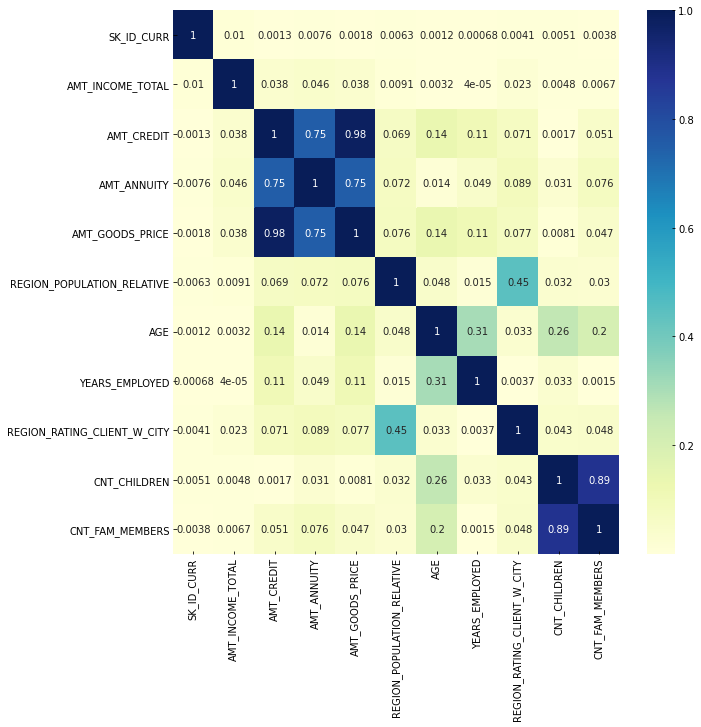

In [93]:
#Heatmap showing Correlation for Defaulters (Target =1), considering absolute values of correlation from the table above
corr1 = abs(corr1)
plt.figure(figsize=(10,10))
sns.heatmap(corr1, cmap="YlGnBu",annot=True)
plt.show()

### Top 10 Correlation for Defaulters (Target =1)

In [94]:
# Finding top 10 correlations for Defaulters (Target =1)
corr = application_data_1.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10)

,Var1,Var2,Correlation,Correlation_abs
46,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
119,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
47,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
35,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
93,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.446977,0.446977
83,YEARS_EMPLOYED,AGE,0.306509,0.306509
105,CNT_CHILDREN,AGE,-0.259222,0.259222
116,CNT_FAM_MEMBERS,AGE,-0.203403,0.203403
70,AGE,AMT_GOODS_PRICE,0.135603,0.135603
68,AGE,AMT_CREDIT,0.135070,0.135070


### Correlation for Non-defaulters (Target =0)

In [95]:
corr0 = application_data_0.corr()
corr0

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,CNT_FAM_MEMBERS
SK_ID_CURR,1.000000,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001318,-0.000126,-0.000739,-0.000716,-0.002790
AMT_INCOME_TOTAL,0.001739,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062494,0.029933,-0.200466,0.027397,0.034256
AMT_CREDIT,-0.000342,0.342799,1.000000,0.771309,0.987250,0.100604,0.047366,0.087327,-0.112238,0.003081,0.064536
AMT_ANNUITY,0.000068,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012254,0.052036,-0.145153,0.020905,0.075787
AMT_GOODS_PRICE,-0.000205,0.349462,0.987250,0.776686,1.000000,0.103827,0.044552,0.088476,-0.112601,-0.000525,0.062814
REGION_POPULATION_RELATIVE,0.000360,0.167851,0.100604,0.120988,0.103827,1.000000,0.025332,-0.008330,-0.537301,-0.024363,-0.023425
AGE,0.001318,-0.062494,0.047366,-0.012254,0.044552,0.025332,1.000000,0.351910,-0.000854,-0.336907,-0.285806
YEARS_EMPLOYED,-0.000126,0.029933,0.087327,0.052036,0.088476,-0.008330,0.351910,1.000000,0.015428,-0.062893,-0.031448
REGION_RATING_CLIENT_W_CITY,-0.000739,-0.200466,-0.112238,-0.145153,-0.112601,-0.537301,-0.000854,0.015428,1.000000,0.021866,0.028657
CNT_CHILDREN,-0.000716,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336907,-0.062893,0.021866,1.000000,0.878571


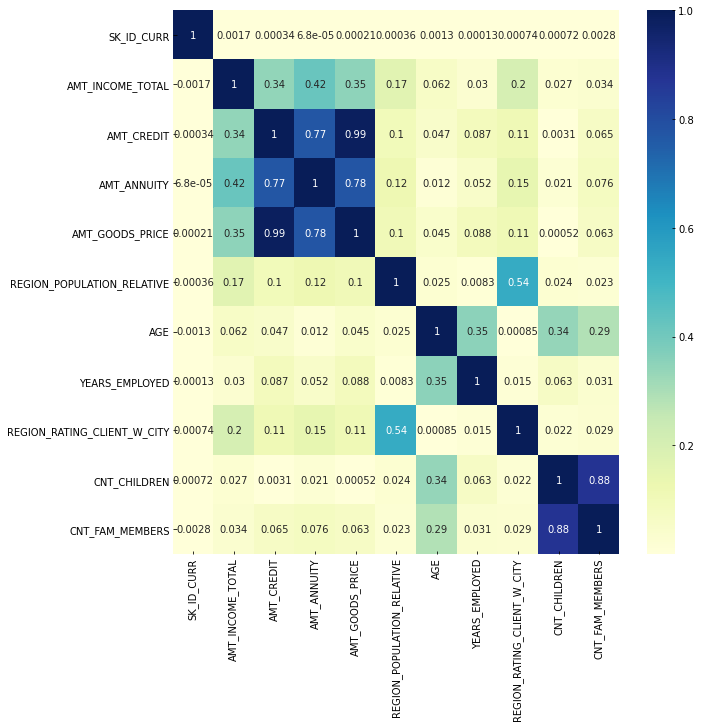

In [96]:
#Heatmap showing Correlation for Non-Defaulters (Target =0), considering absolute values of correlation from the table above
corr0 = abs(corr0)
plt.figure(figsize=(10,10))
sns.heatmap(corr0, cmap="YlGnBu",annot=True)
plt.show()

### Top 10 Correlation for Defaulters (Target =0)

In [97]:
# Finding top 10 correlations for Non-Defaulters (Target =0)
corr = application_data_0.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace  = True)
corr_df['Correlation_abs'] = corr_df['Correlation'].abs()
corr_df.sort_values("Correlation_abs", ascending = False, inplace = True)
corr_df.head(10)

,Var1,Var2,Correlation,Correlation_abs
46,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
119,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
47,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
35,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
93,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,-0.537301,0.537301
34,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
83,YEARS_EMPLOYED,AGE,0.351910,0.351910
45,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
23,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
105,CNT_CHILDREN,AGE,-0.336907,0.336907


**Observations and inferences:**

We observe the top 10 pairs of correlated variables for both the defaulter (Target=1) and non-defaulter (Target=0) categories. It can be seen that the top 6 pairs of variables having the highest correlation are common across both the groups.

AMT_GOODS_PRICE, AMT_CREDIT	: Highly correlated pair. The credit amount of the loan increases as the price of the goods for which the loan is being taken increases. Higher the goods price, higher is the credit amount.

CNT_FAM_MEMBERS, CNT_CHILDREN: This pair of variables has a high correlation of	0.8 between them. The number of children the client has bears a strong correlation with the cient's family members count.

AMT_GOODS_PRICE, AMT_ANNUITY: The loan annuity amount and the price of the goods for which the loan is being taken is strongly correlated at around 0.7. Higher the goods price for the loan, higher is the annuity amount.

AMT_ANNUITY, AMT_CREDIT: The credit amount of the loan and the annuity amount of the loan has a strong correlation of around 0.7, as an increase or decrease in one of them causes the other to increase or decrease proportionately.

YEARS_EMPLOYED, AGE : The age of the client and the number of years of employment have a strong correlation, as an increase or decrease in one is associated with a corresponding increase or decrease of the other variable.


# Previous application Analytics

## Objective : To merge this data with application data set and perform univariate and bivariate analysis to find some pattern.

#### When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
#### `Approved:` The Company has approved loan Application
#### `Cancelled:` The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
#### `Refused:` The company had rejected the loan (because the client does not meet their requirements etc.).
#### `Unused offer:`  Loan has been cancelled by the client but on different stages of the process.
#### We will try to explore how consumer attributes and loan attributes influence the tendency of default.

In [98]:
#checking the top 5 rows of the data frame previous_application
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#checking the info for data frame previous_application
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [100]:
#Statistical description of the previous_application dataframe
previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [101]:
#checking the rows & columns count the previous_application dataframe
previous_application.shape

(1670214, 37)

In [102]:
#checking the dataframe previous_application for any duplicate rows
print(previous_application.duplicated(subset=None, keep='first').sum())

0


## Merging application_data and previous_application data


In [103]:
# Merging application_data and previous_application
# we will do left join with application data to retain all rows of previous_application data
merged_application = pd.merge(left = previous_application, right=application_data_final, how='left', on='SK_ID_CURR', suffixes='_p')

In [104]:
#checking the rows & columns count the merged_application dataframe
merged_application.shape

(1670214, 64)

In [105]:
#checking the top 5 rows of the data frame merged_application
merged_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_,AMT_ANNUITY_,AMT_APPLICATION,AMT_CREDIT_,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDITp,AMT_ANNUITYp,AMT_GOODS_PRICEp,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,NAME_CONTRACT_TYPEp,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE,FLAG_EMAIL,INCOME_GROUP,AGE_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0,F,N,Y,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,0.046220,39.0,20.0,1,NaN,1.0,0,0,Military,Cash loans,1.0,3.0,House / apartment,0,IncomeCategory3,Agegroup_30-40
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0,F,N,N,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,0.025164,58.0,3.0,1,Private service staff,2.0,0,0,Self-employed,Revolving loans,0.0,2.0,House / apartment,0,IncomeCategory5,Agegroup_50-60
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0,F,N,Y,40500.0,284400.0,16456.5,225000.0,Working,Secondary / secondary special,Married,0.025164,28.0,3.0,1,Core staff,2.0,0,0,Postal,Cash loans,3.0,5.0,House / apartment,0,IncomeCategory5,Agegroup_20-30
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0,M,Y,Y,315000.0,1687266.0,64395.0,1575000.0,Pensioner,Secondary / secondary special,Married,0.025164,60.0,1000.0,0,NaN,2.0,0,0,XNA,Cash loans,0.0,2.0,House / apartment,0,IncomeCategory2,Agegroup_50-60
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,0,F,N,N,180000.0,628069.5,34200.0,499500.0,State servant,Secondary / secondary special,Married,0.028663,27.0,6.0,1,NaN,2.0,1,1,Security Ministries,Cash loans,1.0,3.0,House / apartment,0,IncomeCategory4,Agegroup_20-30


In [106]:
#Converting oject datatype columns into category datatype columns
merged_application[merged_application.select_dtypes(['object']).columns] = merged_application.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [107]:
#verifying the info of the merged_application dataframe
merged_application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670214 entries, 0 to 1670213
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE_          1670214 non-null  category
 3   AMT_ANNUITY_                 1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT_                  1670213 non-null  float64 
 6   AMT_DOWN_PAYMENT             774370 non-null   float64 
 7   AMT_GOODS_PRICE_             1284699 non-null  float64 
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 12  RATE_DOWN_PAYMENT           

## Segmenting the merged dataframe w.r.t Target variable (clients with payment difficulties and no payment difficulties)

In [108]:
merged_application_data_1 = merged_application[merged_application["TARGET"] == 1]
merged_application_data_0 = merged_application[merged_application["TARGET"] == 0]

In [109]:
#checking the top 5 rows of the data frame merged_application_data_1
merged_application_data_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_,AMT_ANNUITY_,AMT_APPLICATION,AMT_CREDIT_,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDITp,AMT_ANNUITYp,AMT_GOODS_PRICEp,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,NAME_CONTRACT_TYPEp,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE,FLAG_EMAIL,INCOME_GROUP,AGE_GROUP
27,1676258,433469,Cash loans,22242.825,247500.0,268083.0,0.0,247500.0,THURSDAY,14,Y,1,0.0,NaN,NaN,XNA,Approved,-1883,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,Country-wide,-1,Consumer electronics,18.0,high,Cash X-Sell: high,365243.0,-1853.0,-1343.0,-1343.0,-1334.0,1.0,1,F,Y,N,135000.0,675000.0,53460.0,675000.0,Working,Higher education,Married,0.035792,39.0,1.0,1,Core staff,2.0,0,1,Self-employed,Cash loans,0.0,2.0,House / apartment,0,IncomeCategory4,Agegroup_30-40
52,1912041,253391,Cash loans,5294.430,45000.0,47970.0,NaN,45000.0,SUNDAY,17,Y,1,NaN,NaN,NaN,XNA,Refused,-774,Cash through the bank,HC,Unaccompanied,Refreshed,XNA,Cash,x-sell,Regional / Local,333,Consumer electronics,12.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN,1,F,N,Y,81000.0,112068.0,7488.0,99000.0,Working,Secondary / secondary special,Single / not married,0.025164,26.0,1.0,1,Core staff,2.0,0,0,Trade: type 7,Cash loans,0.0,1.0,House / apartment,0,IncomeCategory5,Agegroup_20-30
58,1760006,283527,Cash loans,14730.660,72000.0,72000.0,NaN,72000.0,WEDNESDAY,15,Y,1,NaN,NaN,NaN,XNA,Approved,-183,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,6.0,high,Cash X-Sell: high,365243.0,-153.0,-3.0,-3.0,365243.0,0.0,1,M,N,N,360000.0,539100.0,29245.5,450000.0,Commercial associate,Secondary / secondary special,Single / not married,0.072508,35.0,9.0,1,NaN,1.0,0,0,Business Entity Type 2,Cash loans,0.0,1.0,House / apartment,0,IncomeCategory2,Agegroup_30-40
63,1074341,137179,Cash loans,NaN,0.0,0.0,NaN,NaN,FRIDAY,16,Y,1,NaN,NaN,NaN,XNA,Canceled,-237,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,1,F,N,N,135000.0,601677.0,29394.0,423000.0,Working,Secondary / secondary special,Married,0.035792,47.0,4.0,1,Accountants,2.0,0,1,Construction,Cash loans,0.0,2.0,House / apartment,0,IncomeCategory4,Agegroup_40-50
94,2408628,320444,Cash loans,55973.295,1035000.0,1110141.0,NaN,1035000.0,FRIDAY,16,Y,1,NaN,NaN,NaN,XNA,Approved,-953,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,30.0,middle,Cash X-Sell: middle,365243.0,-923.0,-53.0,-53.0,-48.0,1.0,1,F,Y,Y,450000.0,1049094.0,30802.5,751500.0,Commercial associate,Secondary / secondary special,Married,0.072508,37.0,9.0,1,Accountants,1.0,0,0,Transport: type 4,Cash loans,0.0,2.0,House / apartment,0,IncomeCategory1,Agegroup_30-40


In [110]:
#checking the top 5 rows of the data frame merged_application_data_0
merged_application_data_0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_,AMT_ANNUITY_,AMT_APPLICATION,AMT_CREDIT_,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDITp,AMT_ANNUITYp,AMT_GOODS_PRICEp,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,AGE,YEARS_EMPLOYED,FLAG_EMP_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,NAME_CONTRACT_TYPEp,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_HOUSING_TYPE,FLAG_EMAIL,INCOME_GROUP,AGE_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0,F,N,Y,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,0.046220,39.0,20.0,1,NaN,1.0,0,0,Military,Cash loans,1.0,3.0,House / apartment,0,IncomeCategory3,Agegroup_30-40
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0,F,N,N,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,0.025164,58.0,3.0,1,Private service staff,2.0,0,0,Self-employed,Revolving loans,0.0,2.0,House / apartment,0,IncomeCategory5,Agegroup_50-60
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,0,F,N,Y,40500.0,284400.0,16456.5,225000.0,Working,Secondary / secondary special,Married,0.025164,28.0,3.0,1,Core staff,2.0,0,0,Postal,Cash loans,3.0,5.0,House / apartment,0,IncomeCategory5,Agegroup_20-30
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,0,M,Y,Y,315000.0,1687266.0,64395.0,1575000.0,Pensioner,Secondary / secondary special,Married,0.025164,60.0,1000.0,0,NaN,2.0,0,0,XNA,Cash loans,0.0,2.0,House / apartment,0,IncomeCategory2,Agegroup_50-60
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,0,F,N,N,180000.0,628069.5,34200.0,499500.0,State servant,Secondary / secondary special,Married,0.028663,27.0,6.0,1,NaN,2.0,1,1,Security Ministries,Cash loans,1.0,3.0,House / apartment,0,IncomeCategory4,Agegroup_20-30


# Univariate analysis

## Univariate Analysis of merged_application_data_1 (Target =1) and merged_application_data_0 (Target =0) w.r.t NAME_CONTRACT_STATUS

### Univariate: Continuous

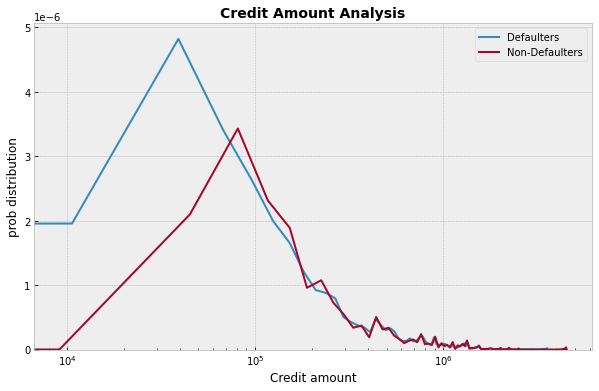

In [142]:
# Credit amount of the loan for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.distplot(merged_application_data_1['AMT_CREDIT_'], hist = False, label = 'Defaulters')
sns.distplot(merged_application_data_0['AMT_CREDIT_'], hist = False, label = 'Non-Defaulters')
plt.xscale('log')
plt.title("Credit Amount Analysis", fontsize = 14, fontweight="bold")
plt.xlabel("Credit amount")
plt.ylabel("prob distribution")
plt.show();

**Inference:** Initially the probability of default is high.

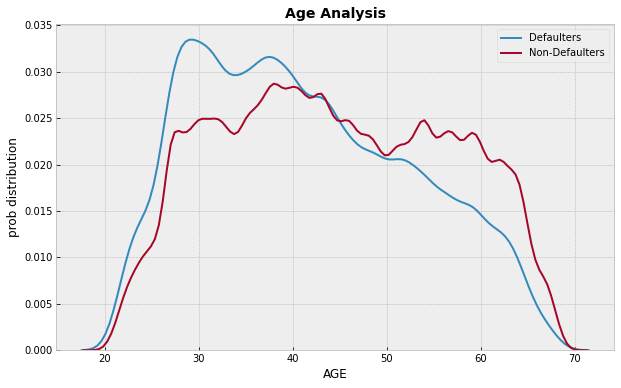

In [112]:
# Age for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
plt.style.use('bmh')
sns.distplot(merged_application_data_1['AGE'], hist=False, label = 'Defaulters')
sns.distplot(merged_application_data_0['AGE'], hist=False, label = 'Non-Defaulters')
plt.title("Age Analysis", fontsize = 14, fontweight="bold")
plt.ylabel("prob distribution")
plt.show();

**Inference:** From the above graph we observe that there is an increase in the probability density of defaulters upto the age of 30 years, after which the number decreases with the increase in age. For non-defaulters, it can be observed to increase in the age group 20-40 and then decrease. So the probability of default decreases as age increases.

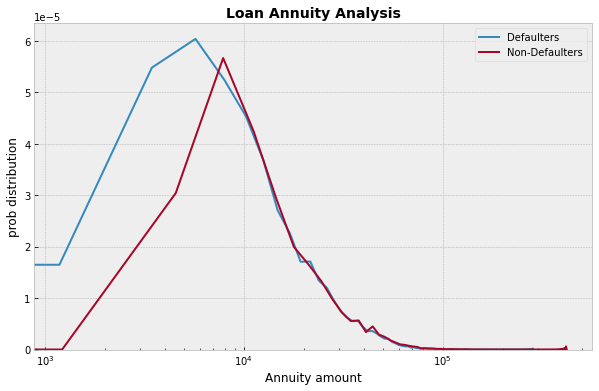

In [143]:
# Loan annuity for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
sns.distplot(merged_application_data_1['AMT_ANNUITY_'], hist=False, label = 'Defaulters')
sns.distplot(merged_application_data_0['AMT_ANNUITY_'], hist=False, label = 'Non-Defaulters')
plt.title("Loan Annuity Analysis", fontsize = 14, fontweight="bold")
plt.xscale('log')
plt.xlabel("Annuity amount")
plt.ylabel("prob distribution")
plt.show();

**Inference:** We observe that the probability density  of defaulters and non-defaulters varies in a similar manner with the annuity amount. There is an increase with the annuity amount, reaches a peak value and then decreases. The defaulters seem to exhibhit the trait a bit earlier.

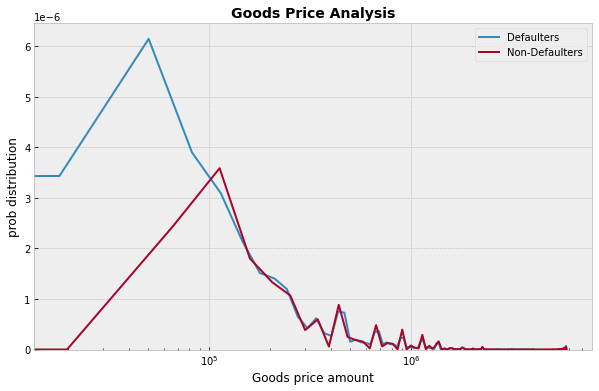

In [144]:
# Price of goods for loan for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
sns.distplot(merged_application_data_1['AMT_GOODS_PRICE_'], hist=False, label = 'Defaulters')
sns.distplot(merged_application_data_0['AMT_GOODS_PRICE_'], hist=False, label = 'Non-Defaulters')
plt.title("Goods Price Analysis", fontsize = 14, fontweight="bold")
plt.xscale('log')
plt.xlabel("Goods price amount")
plt.ylabel("prob distribution")
plt.show();

**Inference:** Similar observtaions of the defaulters exhibhiting the trait a bit earlier.

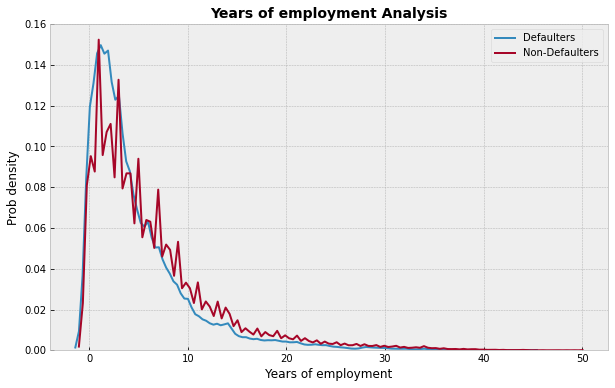

In [145]:
# Years of employment for Defaulters and Non-defaulters
plt.figure(figsize=(10,6))
merged_application_data_1['YEARS_EMPLOYED'].replace(1000,np.nan,inplace=True) #removing the outlier value = 1000 from the graph
merged_application_data_0['YEARS_EMPLOYED'].replace(1000,np.nan,inplace=True) #removing the outlier value = 1000 from the graph
sns.distplot(merged_application_data_1['YEARS_EMPLOYED'], hist=False, label = 'Defaulters')
sns.distplot(merged_application_data_0['YEARS_EMPLOYED'], hist=False, label = 'Non-Defaulters')
plt.title('Years of employment Analysis', fontsize = 14, fontweight="bold")
plt.xlabel('Years of employment')
plt.ylabel('Prob density')
plt.show();

**Inference:** We observe that the probability of a client defaulting is high during their initial years of employment. There is a steep increase in the chances of defaulting observed in 0-2 years of employment, and thereafter the probability decreases as the years of employment increases.


## Univariate: Categorical

In [116]:
#We define a custom function for univariate analysis of categorical columns.
#This custom functions plots two subplots side-by-side for categorical variables, for Target=1 and Target=0 respectively.
# The categorical variable plotted on x-axis, and the percentage of defaulters in that category is plotted on y-axis.

def univariate_categorical_analysis_percent_merged(x):
    plt.figure(figsize=(14,6))
    
    ax1 = plt.subplot(1,2,1)
    merged_application_data_1_percent = merged_application_data_1[x].value_counts()/merged_application[x].value_counts()*100
    merged_application_data_1_percent = pd.DataFrame(merged_application_data_1_percent)
    merged_application_data_1_percent.reset_index(inplace=True)
    merged_application_data_1_percent.rename(columns=  {"index": x, x:"Percentage of Defaulters"}, inplace = True) 
    plot1 = sns.barplot(x=x, y='Percentage of Defaulters', data=merged_application_data_1_percent)
    plot1.set_title("Defaulters (Target=1)")
    plot1.set_xlabel(x)
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=90)
    for p in plot1.patches:
        plot1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    ax0 = plt.subplot(1,2,2)
    merged_application_data_0_percent = merged_application_data_0[x].value_counts()/merged_application[x].value_counts()*100
    merged_application_data_0_percent = pd.DataFrame(merged_application_data_0_percent)
    merged_application_data_0_percent.reset_index(inplace=True)
    merged_application_data_0_percent.rename(columns=  {"index": x, x:"Percentage of Non-Defaulters"}, inplace = True) 
    plot0 = sns.barplot(x=x, y='Percentage of Non-Defaulters', data=merged_application_data_0_percent)
    plot0.set_title("Non Defaulters (Target=0)")
    plot0.set_xlabel(x)
    plot0.set_xticklabels(plot0.get_xticklabels(),rotation=90)
    for p in plot0.patches:
        plot0.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
    
    plt.show()

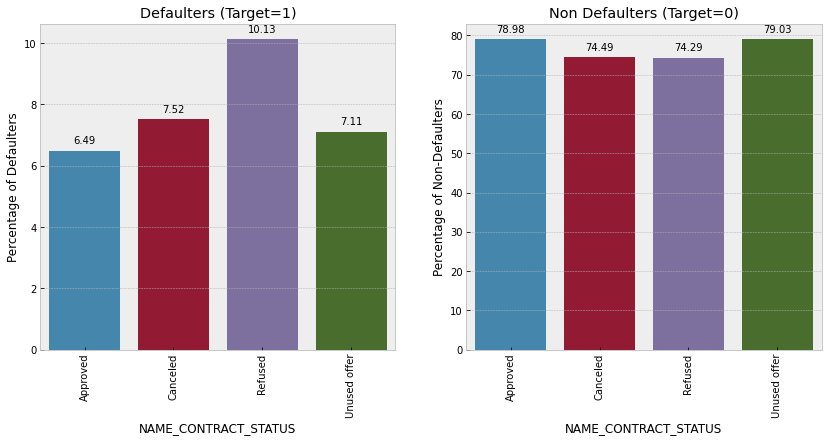

In [117]:
univariate_categorical_analysis_percent_merged("NAME_CONTRACT_STATUS")


**Inference:** It is observed that customers who were refused the loan earlier has the highest percentage of defaults (10.13%).

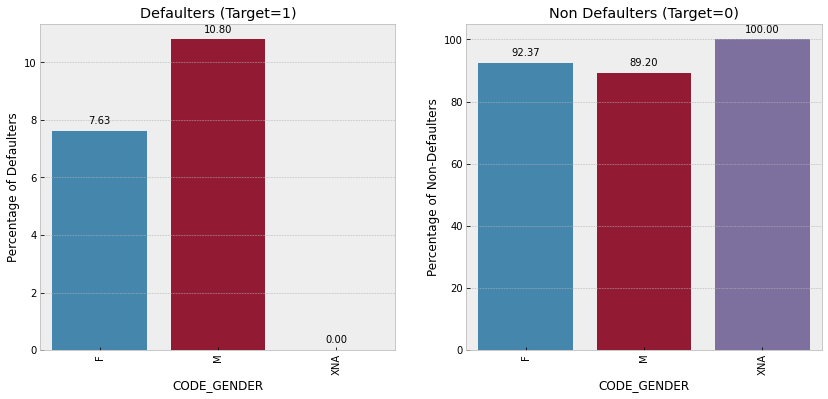

In [118]:
univariate_categorical_analysis_percent_merged("CODE_GENDER")

**Inference:** There is a higher percentage of defaulters amongst male clients than female clients. The percentage of default is 10.80% in males, compared to 7.63% in females.

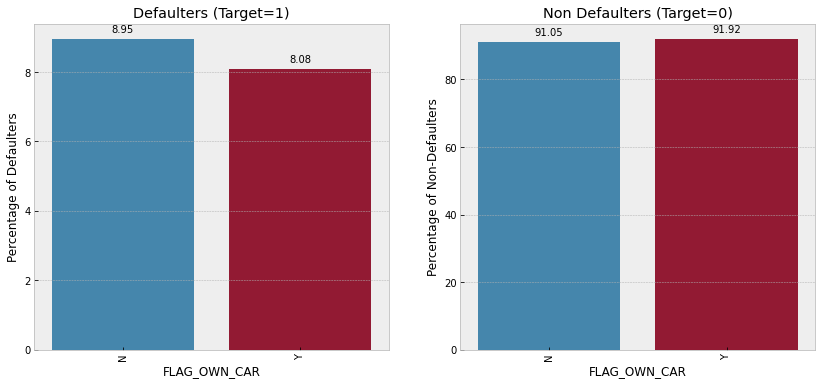

In [119]:
univariate_categorical_analysis_percent_merged("FLAG_OWN_CAR")

**Inference:** Customers owning a car are less likely to default than customers without own cars. The customers who own a car have a defaulter rate of 8.02%, whereas customers not owning a car have a defaulter rate of 8.95%.

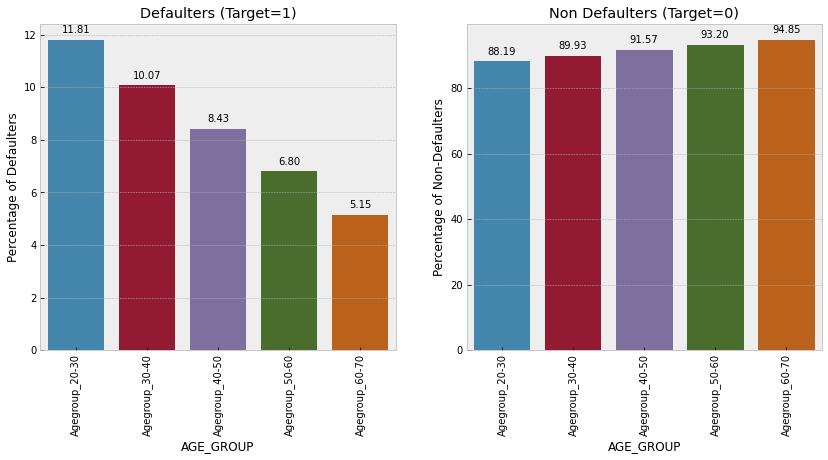

In [120]:
univariate_categorical_analysis_percent_merged("AGE_GROUP")

**Inference:** It is observed that clients in the age group of 20-30 years have the highest default rate at 11.81%. The defaulters rate is inversely proportional to age, and decreases as age of the client increases. The clients in the oldest age group of 60-70 years have a lower default rate of 5.15%.

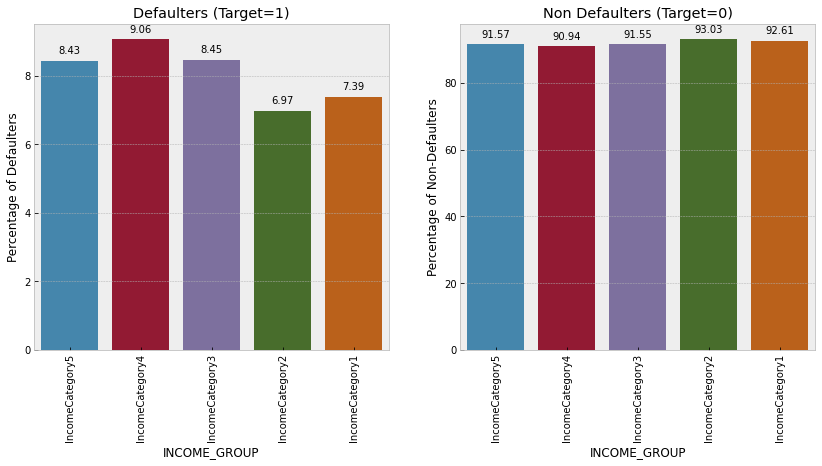

In [121]:
univariate_categorical_analysis_percent_merged("INCOME_GROUP")

**Inference:** We observe the percentage of defaulters amongst the different income groups. The highest income group (Category 1 & 2 has the lowest percentage of defaulters. The Category 4 group (with total income in the range of 100000-200000) is most likely to default, having a default rate of 9.06%. The Category 5 group (with total income in the range of 0-100000) also has a close default rate of 8.43%.

# Bivariate: Categorical-Categorical

In [122]:
# We define a custom function for bivariate analysis of categorical columns.
# This custom functions plots two subplots side-by-side for two categorical variables, for Target=1 and Target=0 respectively.
# One categorical variable plotted on x-axis, the count of that variable is plotted on y-axis, and the hue determines the other categorical variable.

def bivariate_catg_analysis_merged(x1,x2):
    plt.figure(figsize = (14,6))
    
    plt.subplot(1,2,1)
    plt.title("Defaulters(Target=1)")
    sns.countplot(x = x1, hue = x2, data = merged_application_data_1)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.title("Non-Defaulters(Target=0)")
    sns.countplot(x = x1, hue = x2, data = merged_application_data_0)
    plt.xticks(rotation=90)

    plt.show()

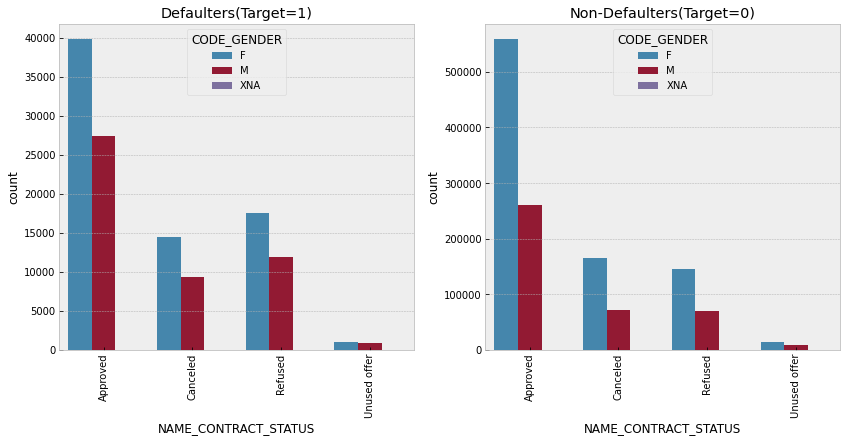

In [123]:
# Bivariate analysis of Categorical variables- clients gender "CODE_GENDER" and NAME_CONTRACT_STATUS
bivariate_catg_analysis_merged("NAME_CONTRACT_STATUS","CODE_GENDER")

**Inference:** Earlier refused category male and female are both likely to default.

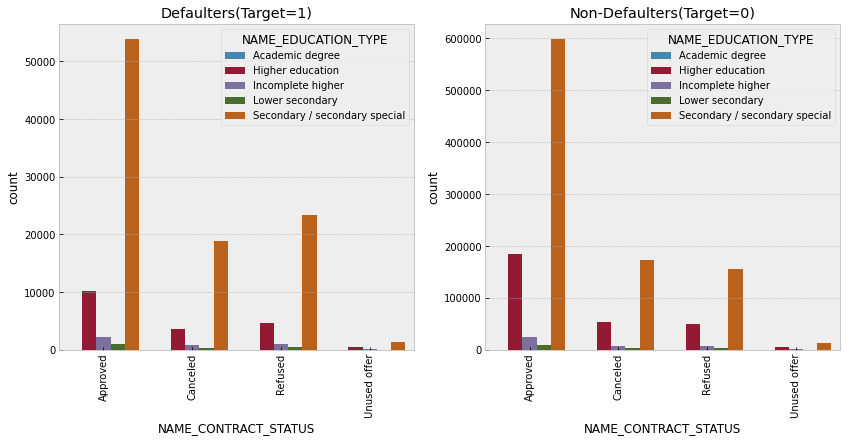

In [124]:
# Bivariate analysis of Categorical variables- clients education "NAME_EDUCATION_TYPE" and NAME_CONTRACT_STATUS
bivariate_catg_analysis_merged("NAME_CONTRACT_STATUS","NAME_EDUCATION_TYPE")

**Inference:** Previous application canceled and refused category with secondary/secondary special is more likely to default.

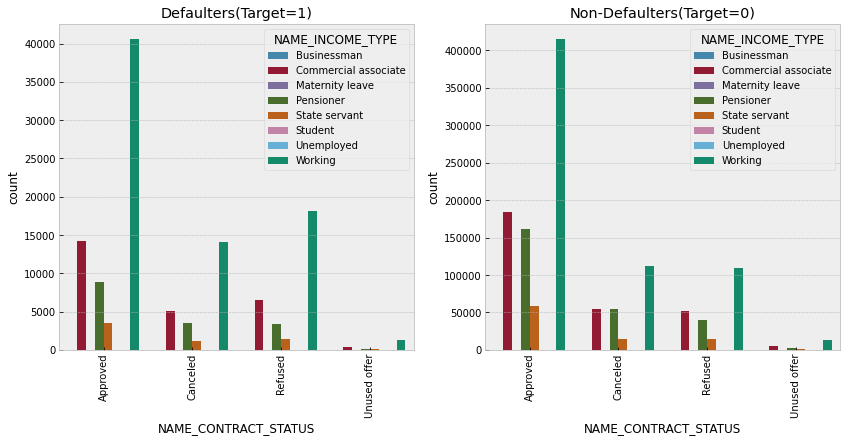

In [125]:
# Bivariate analysis of Categorical variables- clients income type "NAME_INCOME_TYPE" and NAME_CONTRACT_STATUS
bivariate_catg_analysis_merged("NAME_CONTRACT_STATUS","NAME_INCOME_TYPE")

**Inference:** Previous application canceled and refused category who are working class are more likely to default.

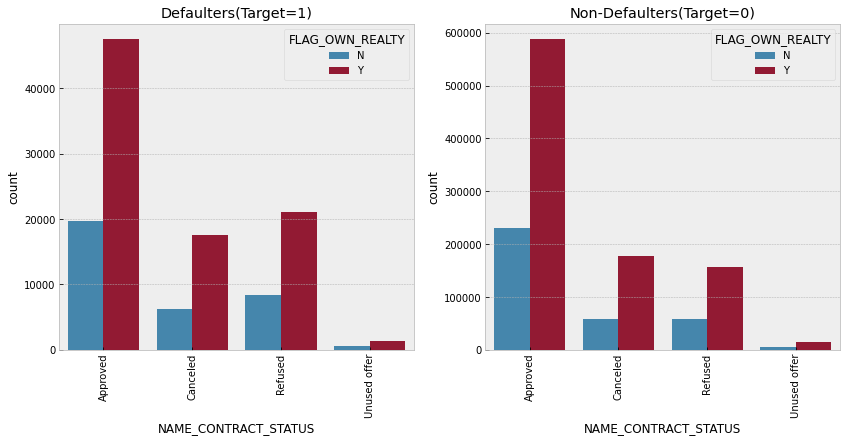

In [126]:
# Bivariate analysis of Categorical variables- clients residence type "NAME_INCOME_TYPE" and NAME_CONTRACT_STATUS
bivariate_catg_analysis_merged("NAME_CONTRACT_STATUS","FLAG_OWN_REALTY")

**Inference:** Previous application canceled and refused category who are not having own reality are more likely to default.

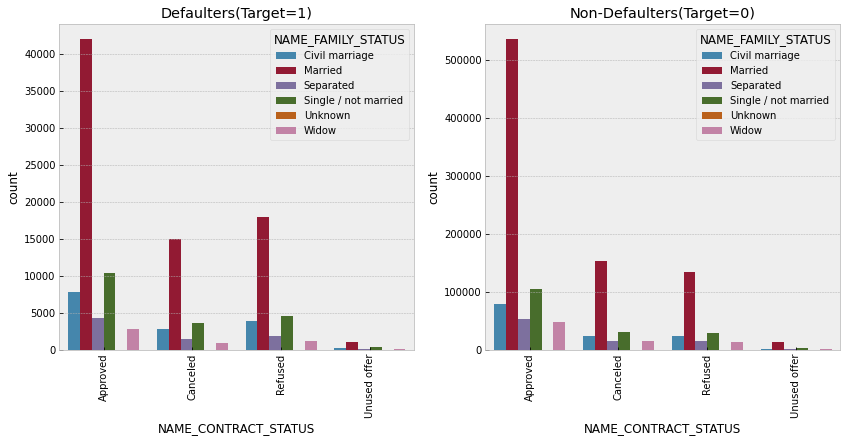

In [127]:
# Bivariate analysis of Categorical variables- clients family status "NAME_FAMILY_STATUS" and NAME_CONTRACT_STATUS
bivariate_catg_analysis_merged("NAME_CONTRACT_STATUS","NAME_FAMILY_STATUS")

**Inference:** Previous application canceled and refused category who are married are more likely to default.

# Bivariate: Categorical-Continous

In [128]:
#We define a custom function for bivariate analysis of continuous & categorical columns.
#This custom functions plots two subplots side-by-side for continuous & categorical variables, for Target=0 and Target=1 respectively.

def bivariate_cont_catg_analysis_merged(x1,x2):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    sns.boxplot(x1,x2, data = merged_application_data_1)
    plt.title("Defaulters (Target=1)")
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.boxplot(x1,x2, data = merged_application_data_0)
    plt.title("Non-Defaulters (Target=0)")
    plt.xticks(rotation=90)
    
    plt.show()

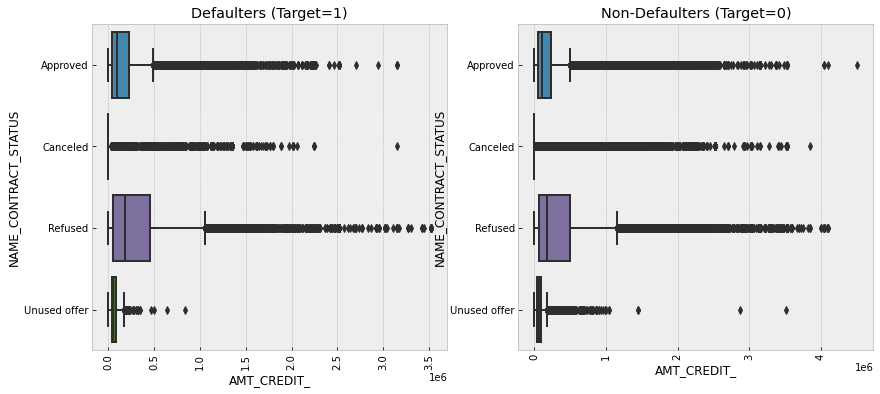

In [129]:
#Loan amount Vs NAME_CONTRACT_STATUS for which loan is taken
bivariate_cont_catg_analysis_merged("AMT_CREDIT_","NAME_CONTRACT_STATUS")

**Inference:** Previous application refused with higher credit are more likely to default.

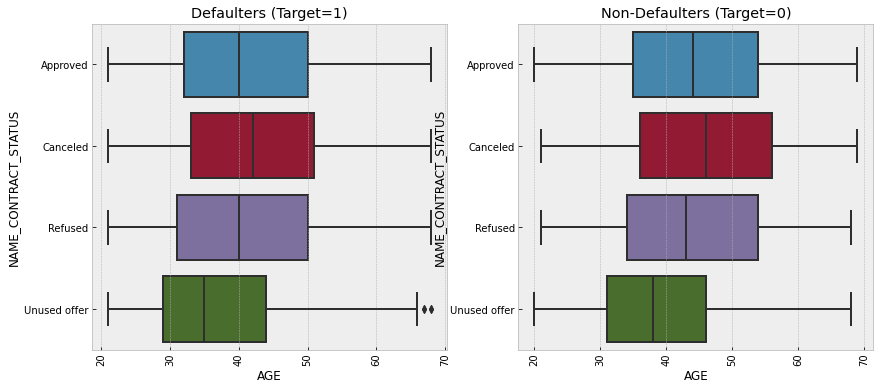

In [130]:
#  AGE Vs NAME_CONTRACT_STATUS for which loan is taken
bivariate_cont_catg_analysis_merged("AGE","NAME_CONTRACT_STATUS")

**Inference:** Previous application refused or canceled`with age range 30 to 50 are more likely to default

# Bivariate: Continous-Continous

In [131]:
#We define a custom function for bivariate analysis of continuous columns.
#This custom functions plots two subplots side-by-side for continuous variables, for Target=0 and Target=1 respectively.

def bivariate_cont_analysis_merged(x1,x2):
    plt.figure(figsize=(14,6))
    
    plt.subplot(1,2,1)
    sns.scatterplot(x1,x2, data = merged_application_data_1)
    plt.title("Defaulters (Target=1)")
    plt.xticks(rotation=90)
    
    plt.subplot(1,2,2)
    sns.scatterplot(x1,x2, data = merged_application_data_0)
    plt.title("Non-Defaulters (Target=0)")
    plt.xticks(rotation=90)
    
    plt.show()

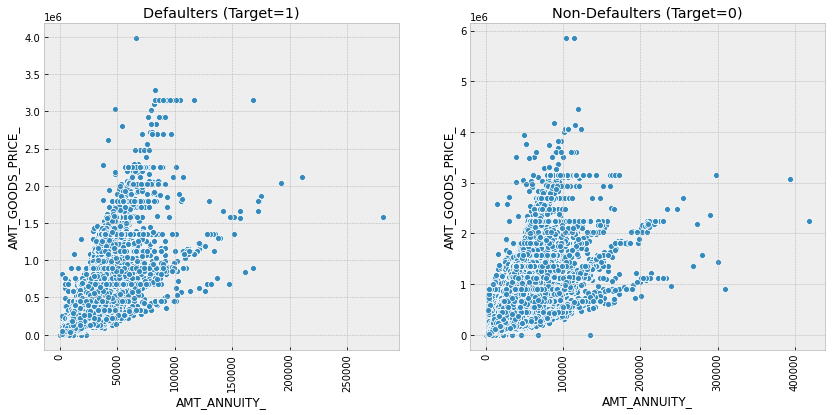

In [132]:
#Annuity amount Vs Price of goods for which loan is taken
bivariate_cont_analysis_merged("AMT_ANNUITY_","AMT_GOODS_PRICE_")

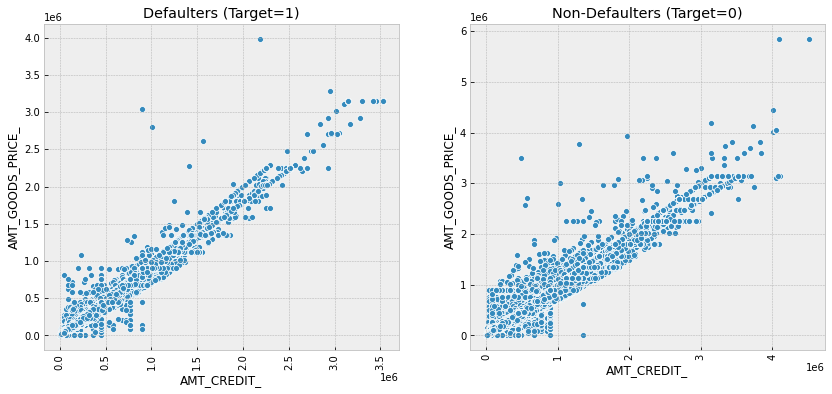

In [133]:
#Loan amount Vs Price of goods for which loan is taken
bivariate_cont_analysis_merged("AMT_CREDIT_","AMT_GOODS_PRICE_")

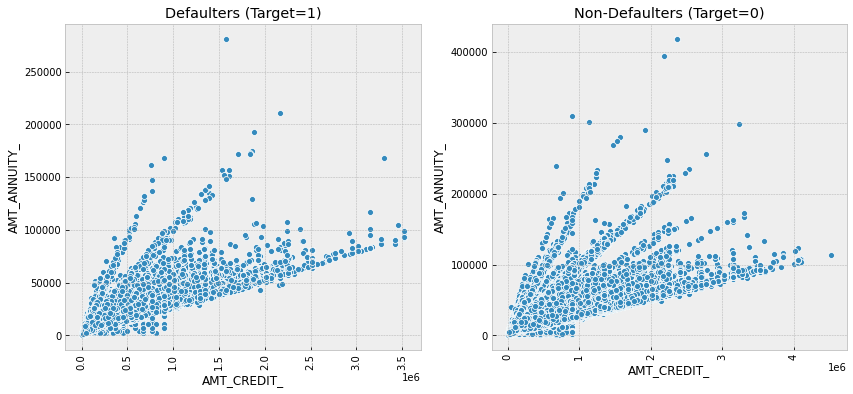

In [134]:
#Credit amount Vs Annuity amount
bivariate_cont_analysis_merged("AMT_CREDIT_","AMT_ANNUITY_")

**Inference:** In all the above cases both the variables increases prportional to one another.

## Multivariate Analysis

In [135]:
# We define a custom function for plotting box plots multivariate analysis of categorical and continuous columns.
# This custom functions plots two subplots side-by-side for categorical variables, for Target=1 and Target=0 respectively.
# One categorical variable plotted on x-axis, one continuous variable is plotted on y-axis, and the hue determines the other categorical variable.

def multivariate_cont_catg_analysis_merged(x1,x2,x3):
    plt.figure(figsize = (14,8))

    ax1 = plt.subplot(1,2,1)
    sns.boxplot(x=x1, y=x2, hue =x3, data = merged_application_data_1)
    plt.xticks(rotation=90)
    plt.title('Defaulters(Target =1)')

    ax0 = plt.subplot(1,2,2)
    sns.boxplot(x=x1, y=x2, hue =x3, data = merged_application_data_0)
    plt.xticks(rotation=90)
    plt.title('Non-Defaulters(Target =0)')

    plt.show()

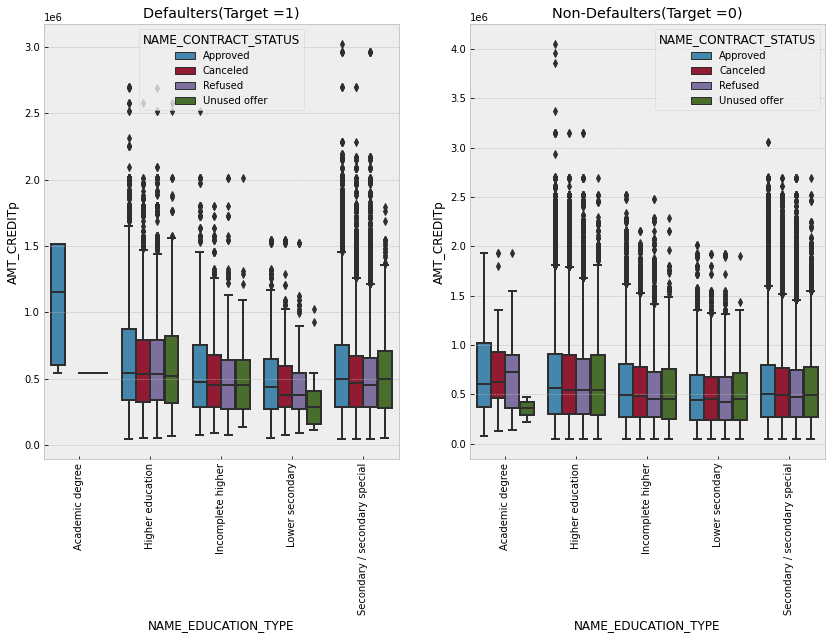

In [136]:
#NAME_EDUCATION_TYPE Vs AMT_CREDIT Vs NAME_CONTRACT_STATUS
multivariate_cont_catg_analysis_merged("NAME_EDUCATION_TYPE","AMT_CREDITp","NAME_CONTRACT_STATUS")

**Inference:** Approved category, with higher credit amount for clients with academic degree , the default probability is high.

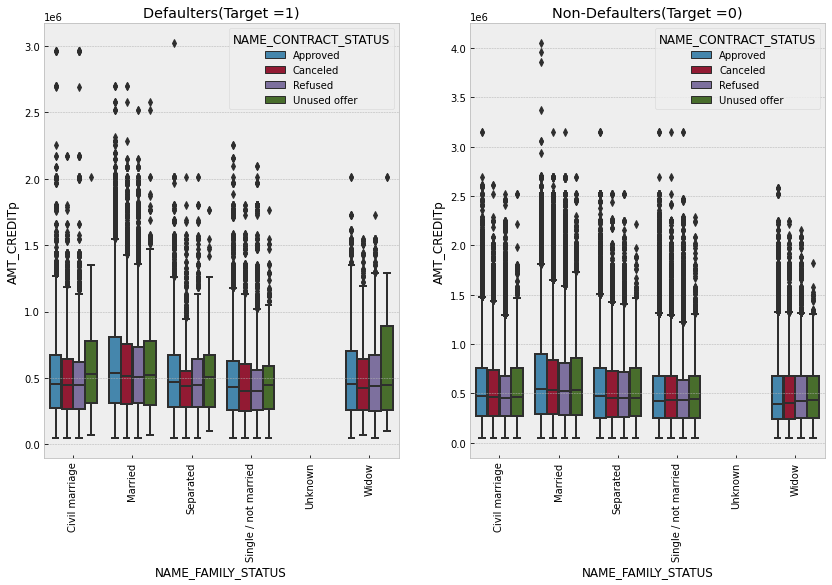

In [137]:
#NAME_FAMILY_STATUS Vs AMT_CREDIT Vs NAME_CONTRACT_STATUS
multivariate_cont_catg_analysis_merged("NAME_FAMILY_STATUS","AMT_CREDITp","NAME_CONTRACT_STATUS")

**Inference:** Widow with earlier unused offer has higher default probability.

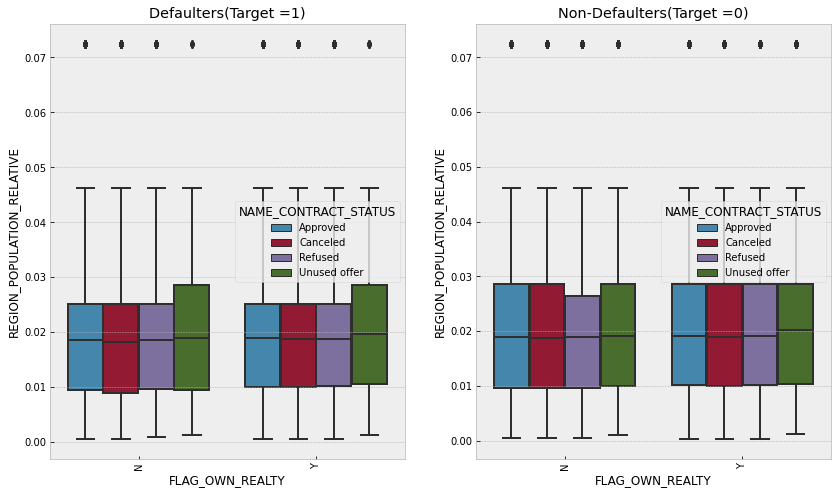

In [138]:
#OWN_REALTY Vs REGION_POPULATION_RELATIVE Vs NAME_CONTRACT_STATUS
multivariate_cont_catg_analysis_merged("FLAG_OWN_REALTY","REGION_POPULATION_RELATIVE","NAME_CONTRACT_STATUS")

**Inference:** Unused offer irrespective of reality status has high default rate.

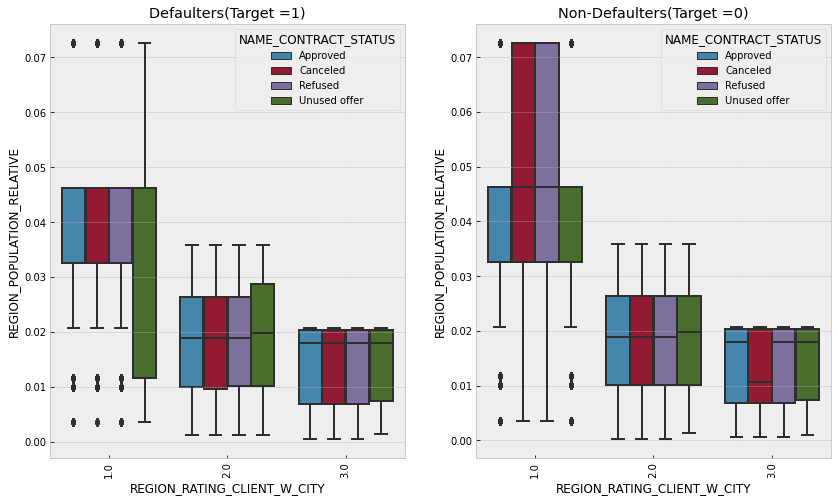

In [139]:
#REGION_RATING_CLIENT_W_CITY Vs REGION_POPULATION_RELATIVE Vs NAME_CONTRACT_STATUS
multivariate_cont_catg_analysis_merged("REGION_RATING_CLIENT_W_CITY","REGION_POPULATION_RELATIVE","NAME_CONTRACT_STATUS")

**Inference:** 
1. Tier-1 city where client lives with higher population has higher rate of default probability for all categories of previous Name_Contract_Status.However, chances of earlier unused status defaulting is on higher side.
2. Earlier cancel and refused status has higher chances of non defaulting in high rated cities.

# FINAL RECOMMENDATION

## Observation:

1. Both the application_data and previous_application datasets have a large number of variables, which contains all the information of the client. We have selected around 26 variables for the purposes of our analysis in this case study, which we consider to have the most impact on  the clients defaulting on their loan repayment.  


2. The various data quality issues are correctly identified and reported (missing value imputation analysis and other kinds of data redundancies, data is converted to a suitable format if applicable, manipulation of strings and dates is done wherever required , outlier observations are identified in the various columns, etc.)  

3. Then we performed univariate and bivariate analysis of different variables. The combinations of variables are chosen such that they make business or analytical sense, and the important combinations of driver variables are identified. Appropriate plots are created to present the results of the analysis and to generate the interesting insights.  

4. The top 10 pairs of correlated variables for both the defaulter (Target=1) and non-defaulter (Target=0) categories are identified.   

5. The previous application file is merged with the application data file, which is then analysed to obtain relevant insights with respect to the contract status of the previous application (approved/rejected/canceled/unused status).  



## Key Inferences:

1. It has been observed that the probability of default is high amongst applicants in the age group 20-40. The probability of defaulting decreases after 30 years age. So the probability of default decreases as age increases. Clients in the age group of 60-70 years are the least likely to default.

2. The probability of a client defaulting is high during their initial years of employment. There is a steep increase in the chances of defaulting observed in 0-2 years of employment, and thereafter the probability decreases as the years of employment increases, and is the minimum with clients whose years of employment > 30 years.

3. Among the loan categories,  it is observed that customers who have taken cash loans have a higher chance of defaulting than customers who have taken revolving loans.

4. There is a higher percentage of defaulters amongst male clients than female clients. 

5. The highest income group with total income in the range of 400000-500000, has the lowest percentage of defaulters. The lowest income groups with incomes in the range of 100000-200000 and 0-100000 respectively, has the highest default rate.

6.  Clients on maternity leave and unemployed category have very high default rates. On the other hand, students and businessmen have a nil default rate of 0%. However, it is to be noted that the count of such clients is much less in our dataset, hence these observations may not reflect the actual trend due to the low number of observations in these categories.

7. Clients with an academic degree have a very low default rate, whereas clients with a lower secondary or secondary degree have a high default rate.

8. Clients living in rented apartment or with parents have higher default rates, compared to clients living in office apartment who are the least likely defaulters.

9. The default percentage is the highest among low-skill laborers. Whereas accountants core staff, high skill tech staff, HR staff, IT staff and Managers have lower defualt rates among the different occupation groups.

10. Clients living in region/city with rating 1 have the lowest defaut rate, followed by those in region/city with rating 2. In region/city with rating 3 the highest default rate can be observed.

11. For clients whose permanent address or work address does not match their contact address, the percentage of defaulters are likely to be more than clients who have the same contact/permanent/work address.

12. It is observed that customers who were refused the loan earlier has the highest percentage of defaults in their current application.

13. Previous application canceled and refused category who are not having own reality are more likely to default.

14. Previous application refused with higher credit are more likely to default.

15. Previous application refused or canceled with age range 30 to 50 are more likely to default.